# Convergence plots

In [1]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

import sys
import os

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)


## Convergence vs $\Delta x$

Wannier: Number of integration grid set to 257.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.
Wannier: Number of integration grid set to 257.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.
Wannier: Number of integration grid set to 257.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.
Wannier: Number of integration grid set to 257.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.
Wannier: Number of integration grid set to 257.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: s

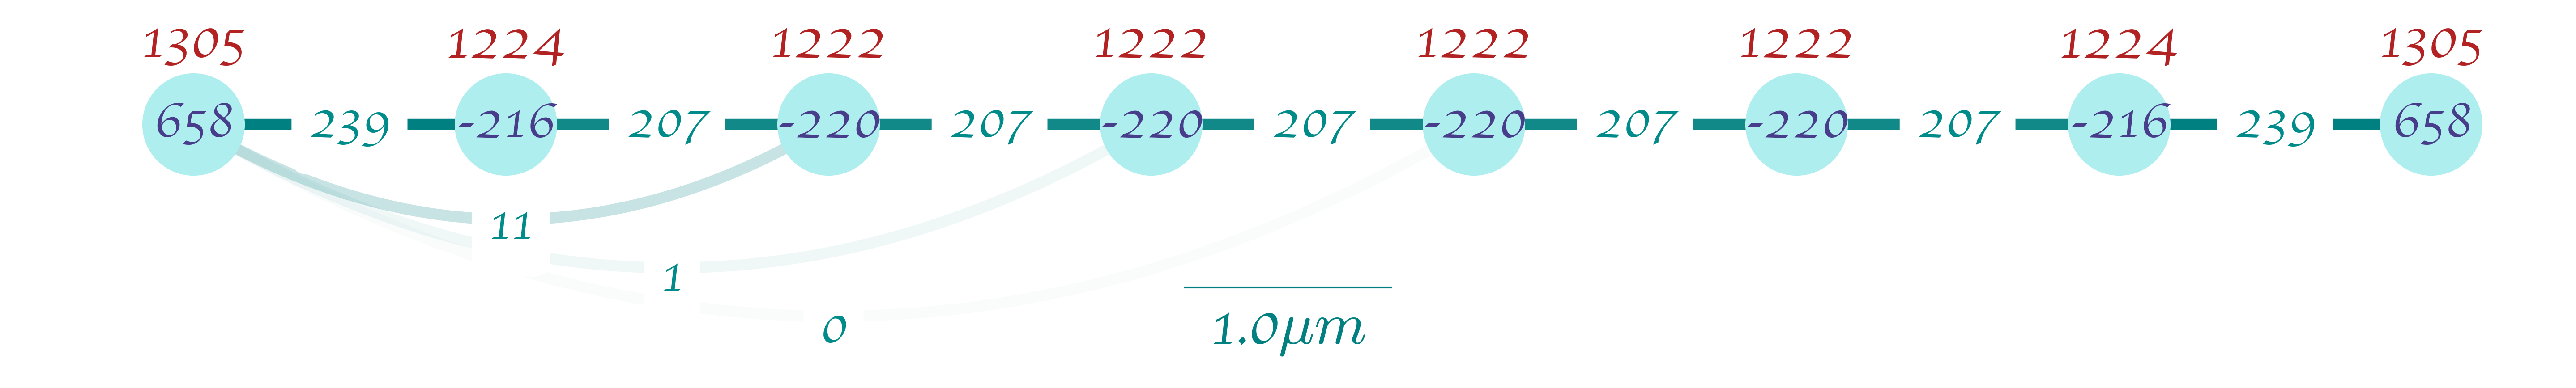

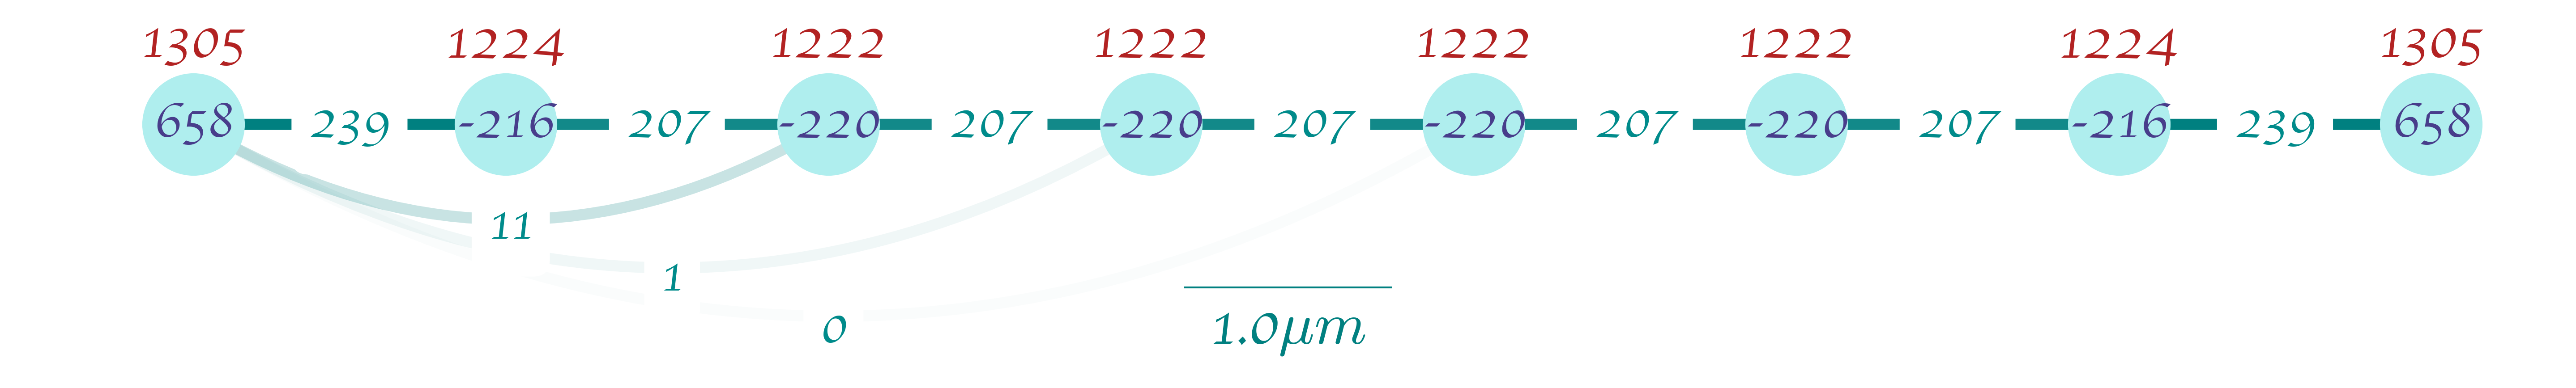

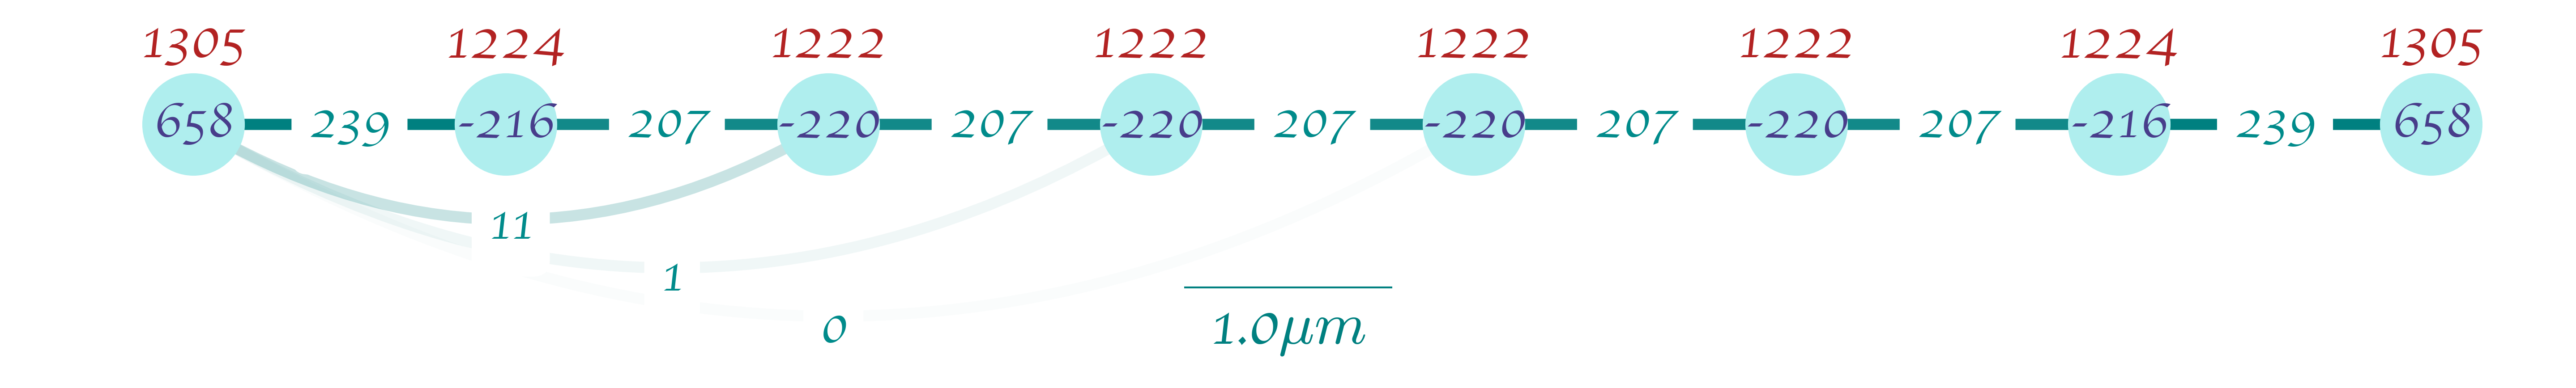

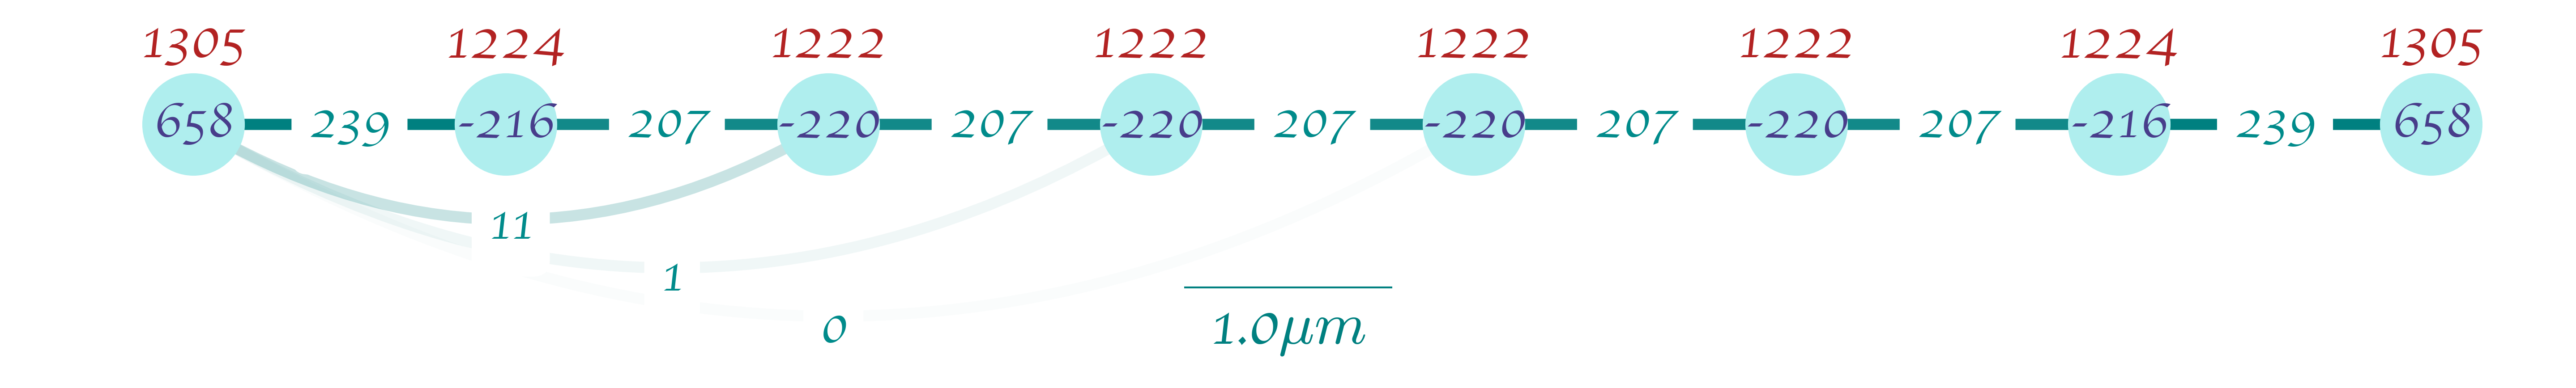

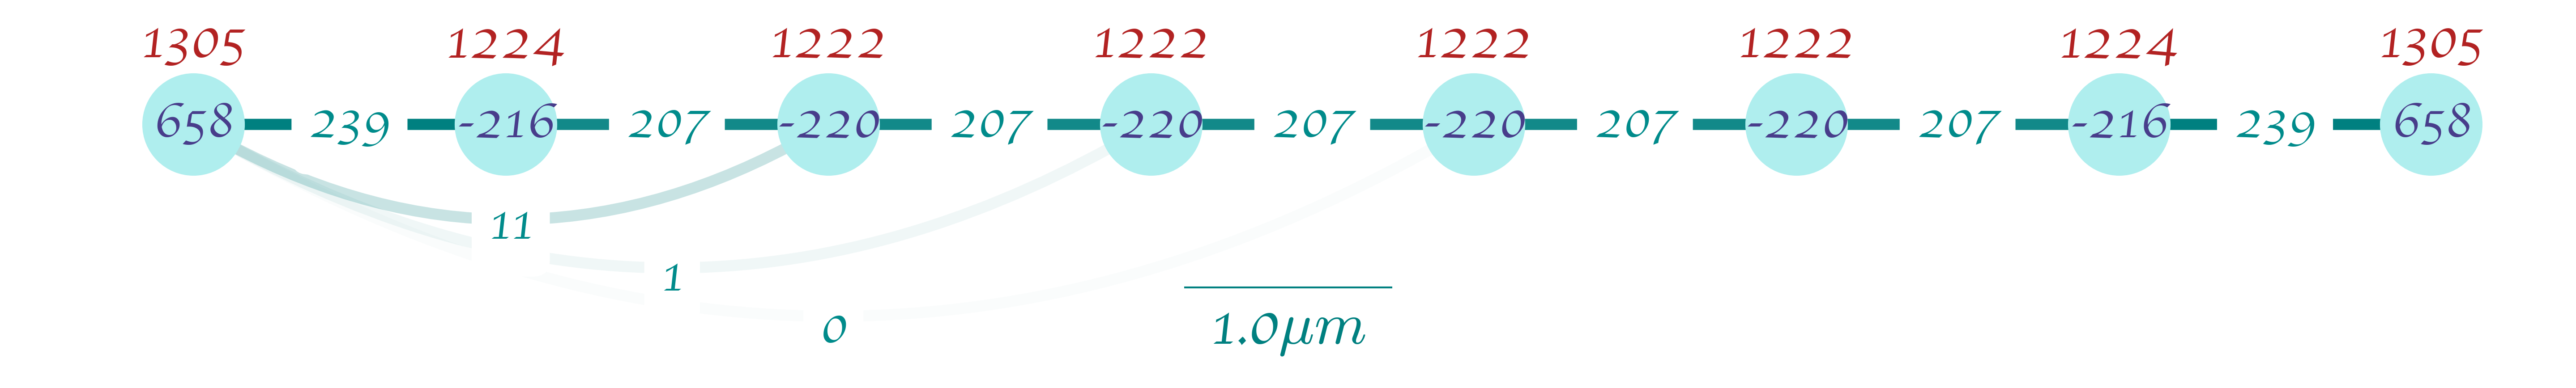

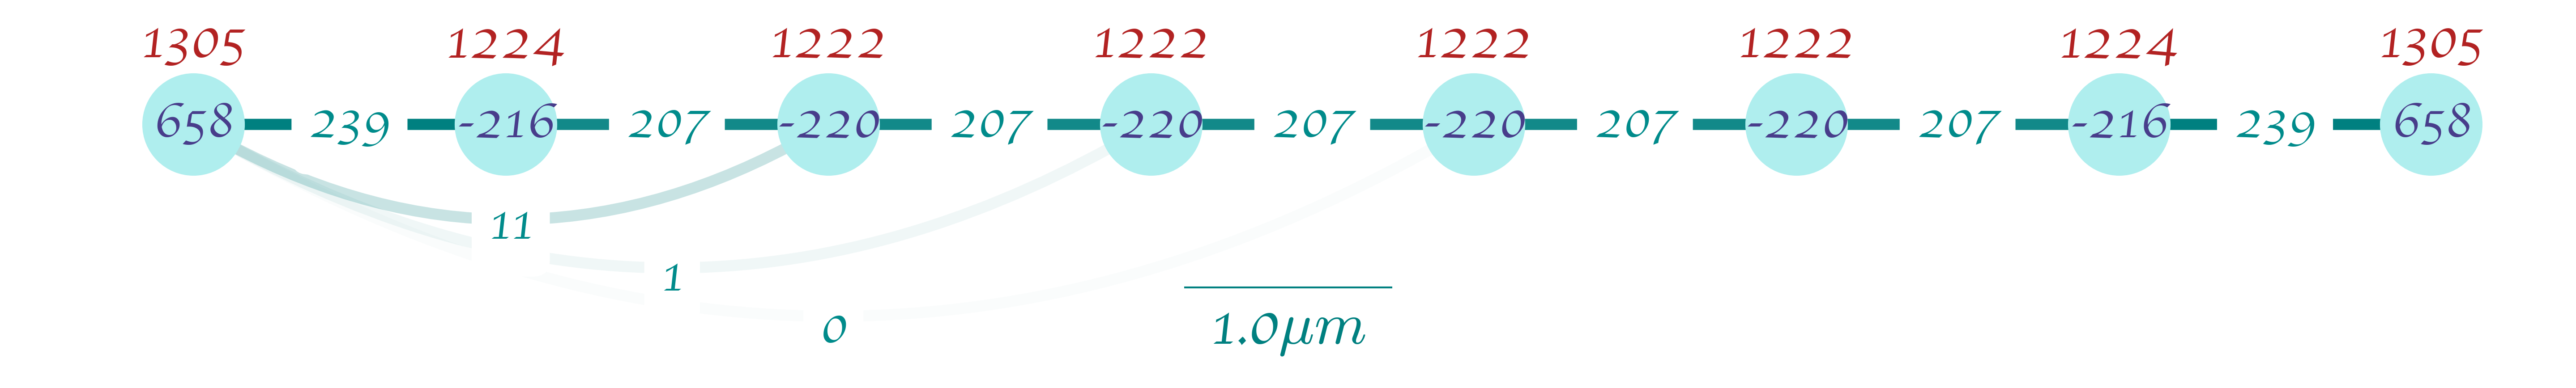

In [117]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *


L = 8
Ly = 1
d = 3
shape = "square"
w = None
eqt = ""
R0 = np.array([3, 3, 7.2])
A_list = []
t_list = []
V_list = []
U_list = []
for N in range(12, 24, 2):
    G = HubbardGraph(
        N,
        R0=R0,
        lattice=np.array([L, Ly], dtype=int),
        trap=(52.26, 1000),
        lc=(1550, 1600),
        ascatt=1770,
        laser=780,
        band=1,
        dim=d,
        sparse=True,
        shape=shape,
        equalize=False,
        verbosity=0,
    )

    fn = f"../../output/Hubbard/convergence/{d}D_{L}x1_{shape}_{w}_N_{N}.ini"
    report = rep.get_report(fn)
    G = read_file(report, G)
    G.draw_graph(nnn=True, A=G.A, U=G.U)
    A_list.append(G.A)
    t_list.append(abs(G.nn_tunneling(G.A)))
    V_list.append(abs(np.diag(G.A)))
    U_list.append(G.U)
print(f"V = {np.diag(G.A)}")
t = abs(G.nn_tunneling(G.A))
print(f"t = {t}")
print(f"U = {G.U}")
print(f"V_err = {G.v_cost_func(G.A, None)}")
print(f"t_err = {G.t_cost_func(G.A, None, None, None)}")
print(f"U_err = {G.u_cost_func(G.U, None)}")


max_err A = 5.713473534855693e-06, max_err U = 1.9249523926458162e-07 max_err = 5.713473534855693e-06
max_err A = 6.153236240992508e-06, max_err U = 1.927945773120798e-07 max_err = 6.153236240992508e-06
max_err A = 6.964919785904862e-06, max_err U = 2.326481927664609e-07 max_err = 6.964919785904862e-06
max_err A = 4.0175601625765266e-05, max_err U = 1.08309683072416e-06 max_err = 4.0175601625765266e-05
max_err A = 1.3724258168570138e-05, max_err U = 2.5332056536915385e-05 max_err = 2.5332056536915385e-05
max_err A = 0.011327379377751598, max_err U = 0.00045834387096463207 max_err = 0.011327379377751598


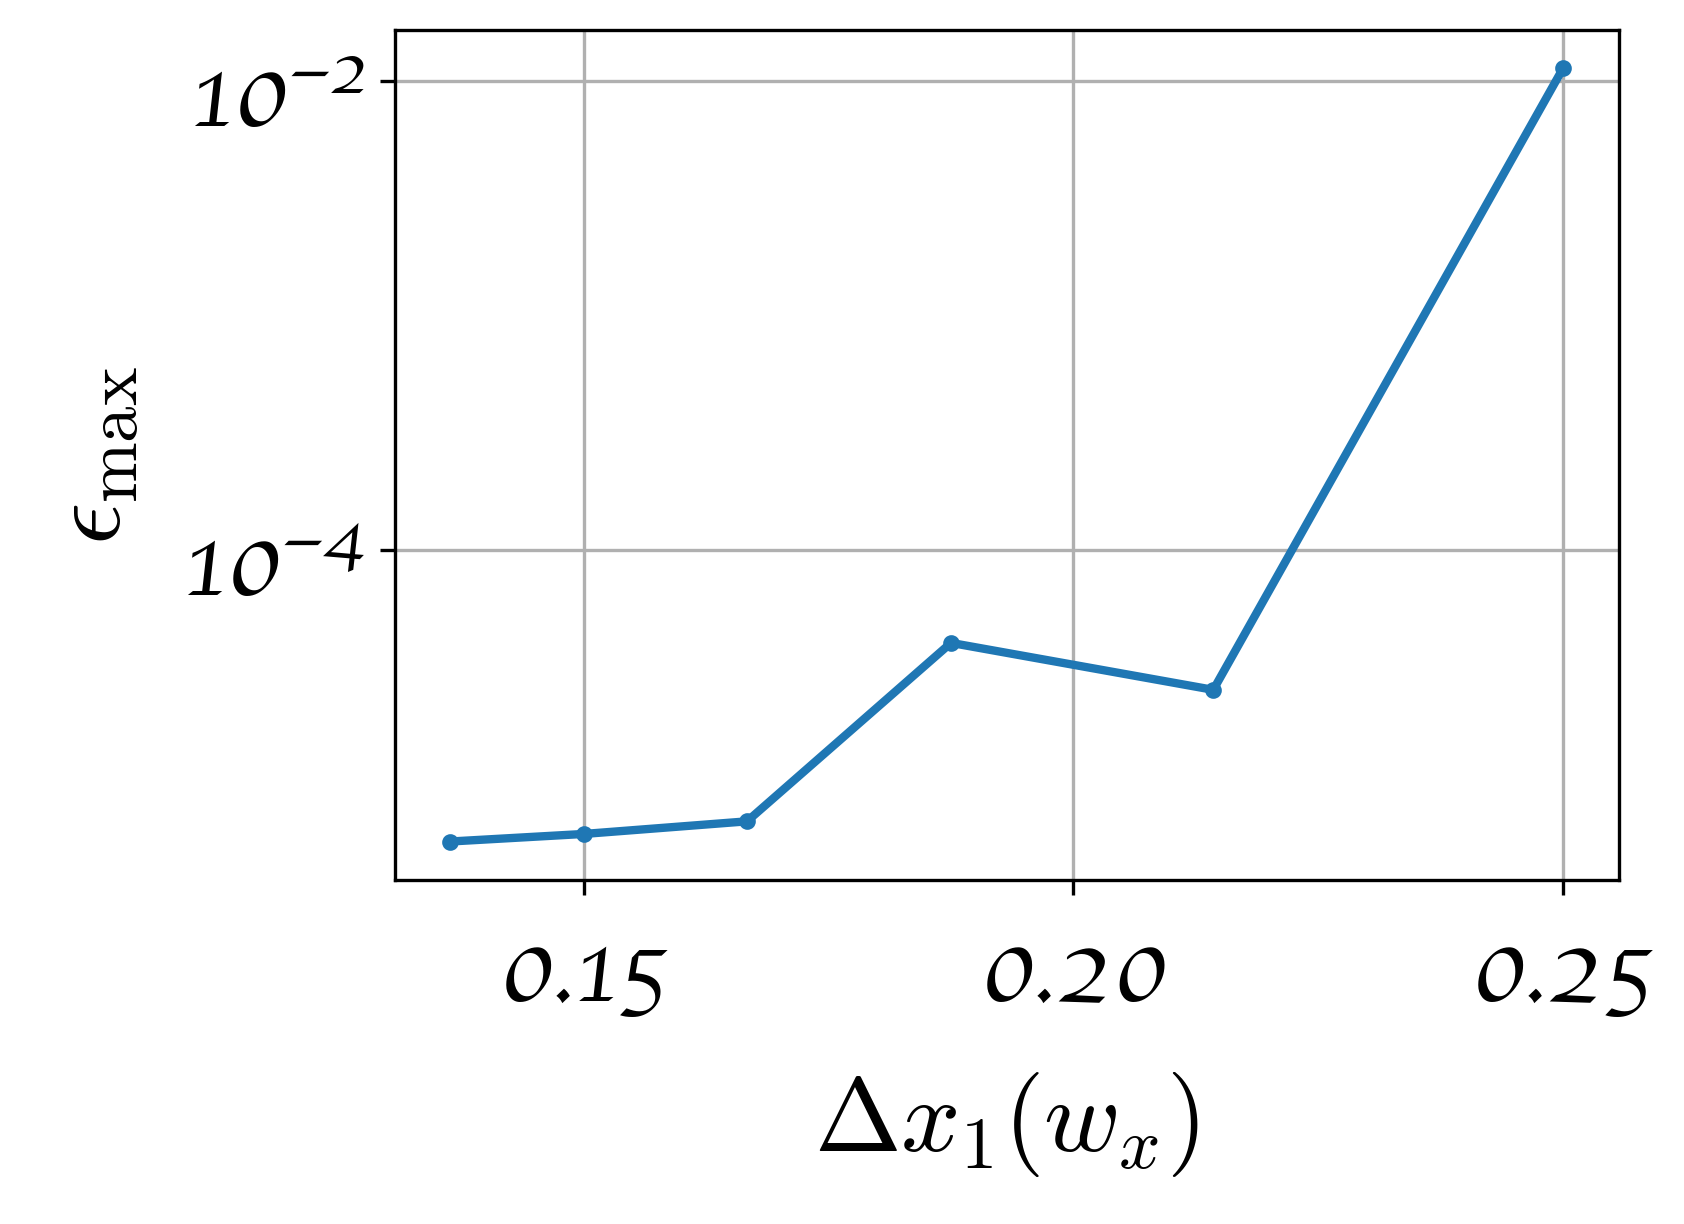

In [52]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

size = 25
params = {
    "figure.figsize": (6, 4.5),
    "legend.fontsize": "xx-large",
    "axes.labelsize": size,
    "axes.titlesize": "xx-large",
    "xtick.labelsize": size,
    "ytick.labelsize": size,
}
plt.rcParams.update(params)
plt.gcf().subplots_adjust(bottom=0.25, left=0.22)

dx = 3 / np.arange(12, 24, 2)[::-1]
tarr = np.array(A_list)[::-1]
Uarr = np.array(U_list)[::-1]
Uinf = np.zeros_like(Uarr[0])
tinf = np.zeros_like(tarr[0])
fitrange = slice(0, 3)
for i in range(L):
    pU = np.polyfit(dx[fitrange], np.log(Uarr[fitrange, i]), 1)
    Uinf[i] = np.exp(pU[1])
    for j in range(L):
        pt = np.polyfit(dx[fitrange], np.log(abs(tarr[fitrange, i, j])), 1)
        tinf[i, j] = np.exp(pt[1])

max_err = np.zeros_like(dx)
for i in range(len(max_err)):
    met = np.max((abs(tarr[i]) - abs(tinf)) / abs(tinf))
    meu = np.max((abs(Uarr[i]) - abs(Uinf)) / abs(Uinf))
    me = max(met, meu)
    print(f"max_err A = {met}, max_err U = {meu} max_err = {me}")
    max_err[i] = me
plt.plot(dx, max_err, ".-", lw=2)

plt.xlabel("$\Delta x_1(w_x)$")
plt.ylabel("$\epsilon_\mathrm{max}$")
plt.yscale("log")
plt.grid()
plt.savefig("AppFig1.pdf")

Do the same thing as the one below

max_err t = -1.4936013380849361e-09, max_err V = 3.9337649466170626e-08, max_err U = 1.9249523926458162e-07 max_err = 1.9249523926458162e-07
max_err t = -1.50533829037789e-09, max_err V = 3.922279947999528e-08, max_err U = 1.927945773120798e-07 max_err = 1.927945773120798e-07
max_err t = -1.8064574240730004e-09, max_err V = 4.7518794667597445e-08, max_err U = 2.326481927664609e-07 max_err = 2.326481927664609e-07
max_err t = -1.3067006927255323e-08, max_err V = 2.155318290608673e-07, max_err U = 1.08309683072416e-06 max_err = 1.08309683072416e-06
max_err t = -8.648445443797598e-07, max_err V = 1.3724258168570138e-05, max_err U = 2.5332056536915385e-05 max_err = 2.5332056536915385e-05
max_err t = 2.504756676458446e-06, max_err V = 0.0006531851404460631, max_err U = 0.00045834387096463207 max_err = 0.0006531851404460631


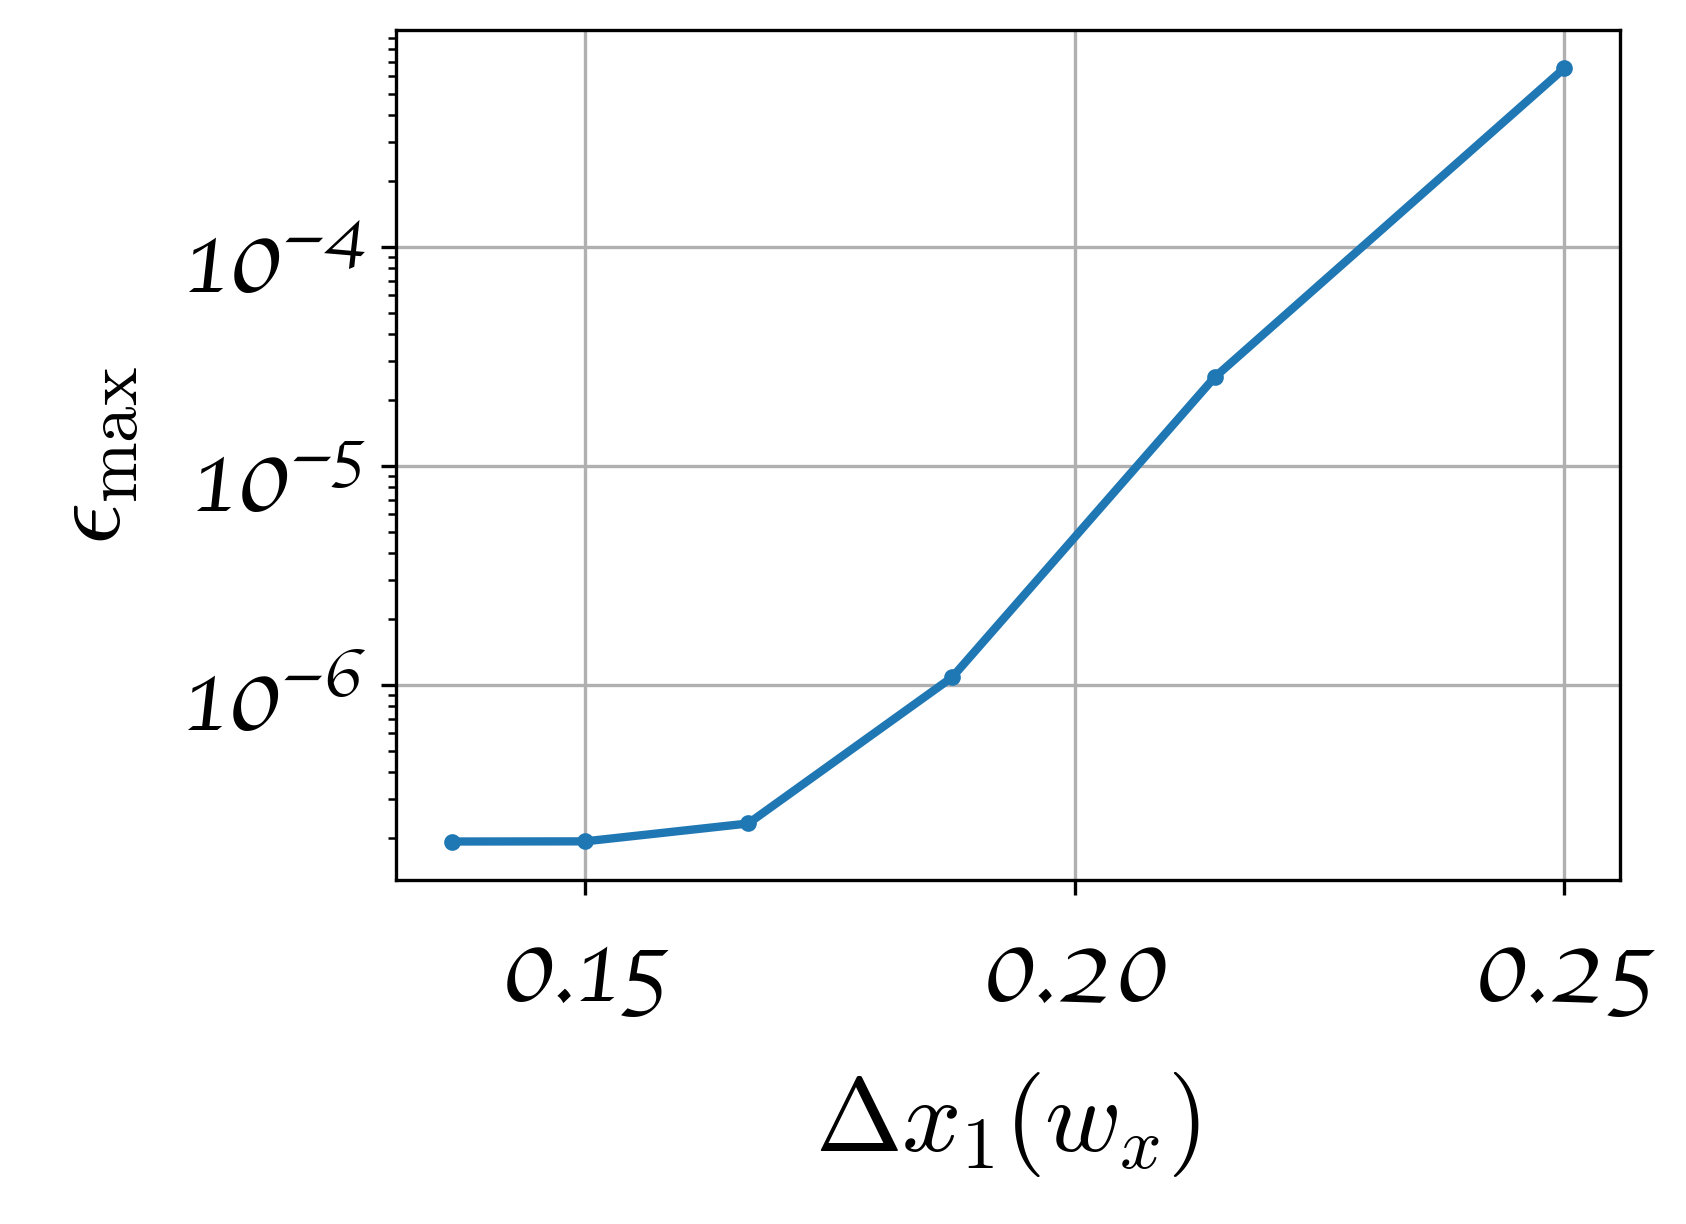

In [120]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

size = 25
params = {
    "figure.figsize": (6, 4.5),
    "legend.fontsize": "xx-large",
    "axes.labelsize": size,
    "axes.titlesize": "xx-large",
    "xtick.labelsize": size,
    "ytick.labelsize": size,
}
plt.rcParams.update(params)
plt.gcf().subplots_adjust(bottom=0.25, left=0.22)

dx = 3 / np.arange(12, 24, 2)[::-1]
tarr = np.array(t_list)[::-1]
Varr = np.array(V_list)[::-1]
Uarr = np.array(U_list)[::-1]
Uinf = np.zeros_like(Uarr[0])
tinf = np.zeros_like(tarr[0])
Vinf = np.zeros_like(Varr[0])
fitrange = slice(0, 3)
for i in range(L):
    pU = np.polyfit(dx[fitrange], np.log(Uarr[fitrange, i]), 1)
    Uinf[i] = np.exp(pU[1])
    pV = np.polyfit(dx[fitrange], np.log(Varr[fitrange, i]), 1)
    Vinf[i] = np.exp(pV[1])
for j in range(len(tinf)):
    pt = np.polyfit(dx[fitrange], np.log(abs(tarr[fitrange, j])), 1)
    tinf[j] = np.exp(pt[1])

max_err = np.zeros_like(dx)
for i in range(len(max_err)):
    met = np.max((abs(tarr[i]) - abs(tinf)) / abs(tinf))
    mev = np.max((abs(Varr[i]) - abs(Vinf)) / abs(Vinf))
    meu = np.max((abs(Uarr[i]) - abs(Uinf)) / abs(Uinf))
    me = max(met, mev, meu)
    print(f"max_err t = {met}, max_err V = {mev}, max_err U = {meu} max_err = {me}")
    max_err[i] = me
plt.plot(dx, max_err, ".-", lw=2)

plt.xlabel("$\Delta x_1(w_x)$")
plt.ylabel("$\epsilon_\mathrm{max}$")
plt.yscale("log")
plt.grid()
plt.savefig("AppFig1.pdf")

## Convergence vs $L$

Wannier: Number of integration grid set to 257.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.
Wannier: Number of integration grid set to 257.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.
Wannier: Number of integration grid set to 257.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.
Wannier: Number of integration grid set to 257.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.
Wannier: Number of integration grid set to 257.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: s

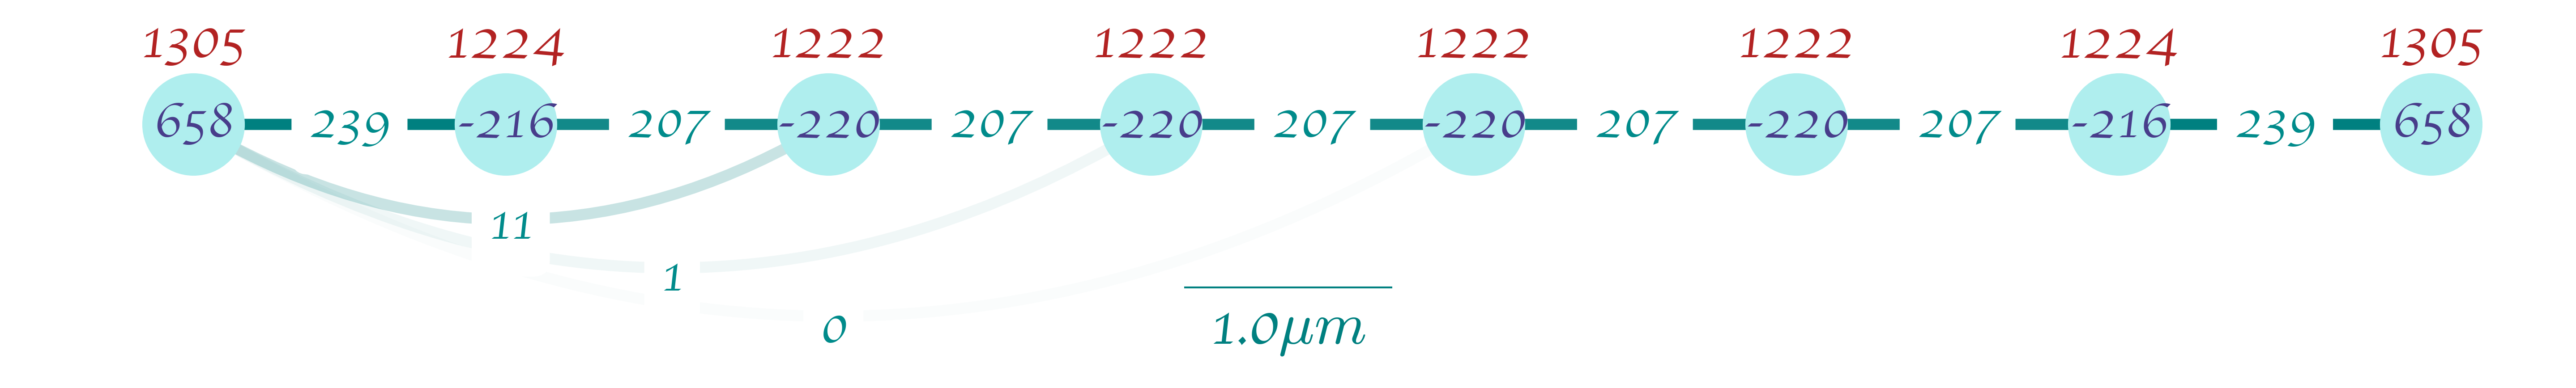

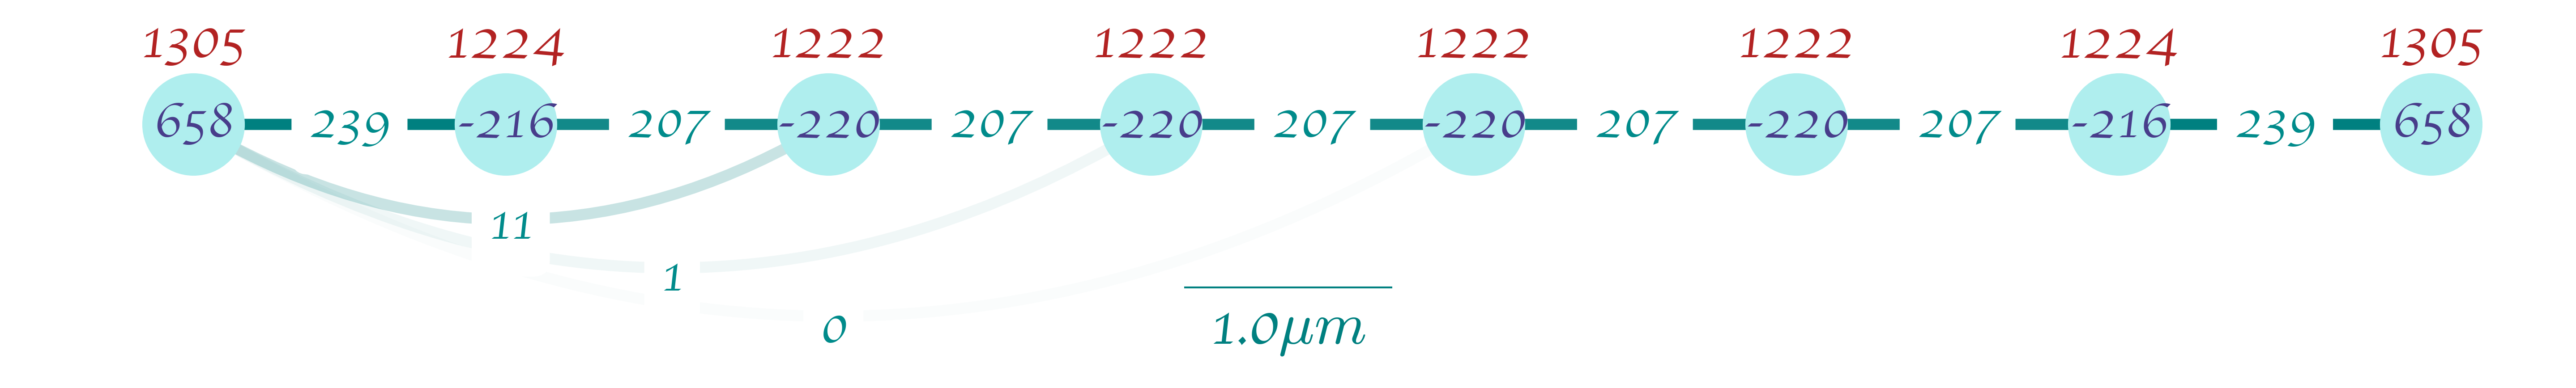

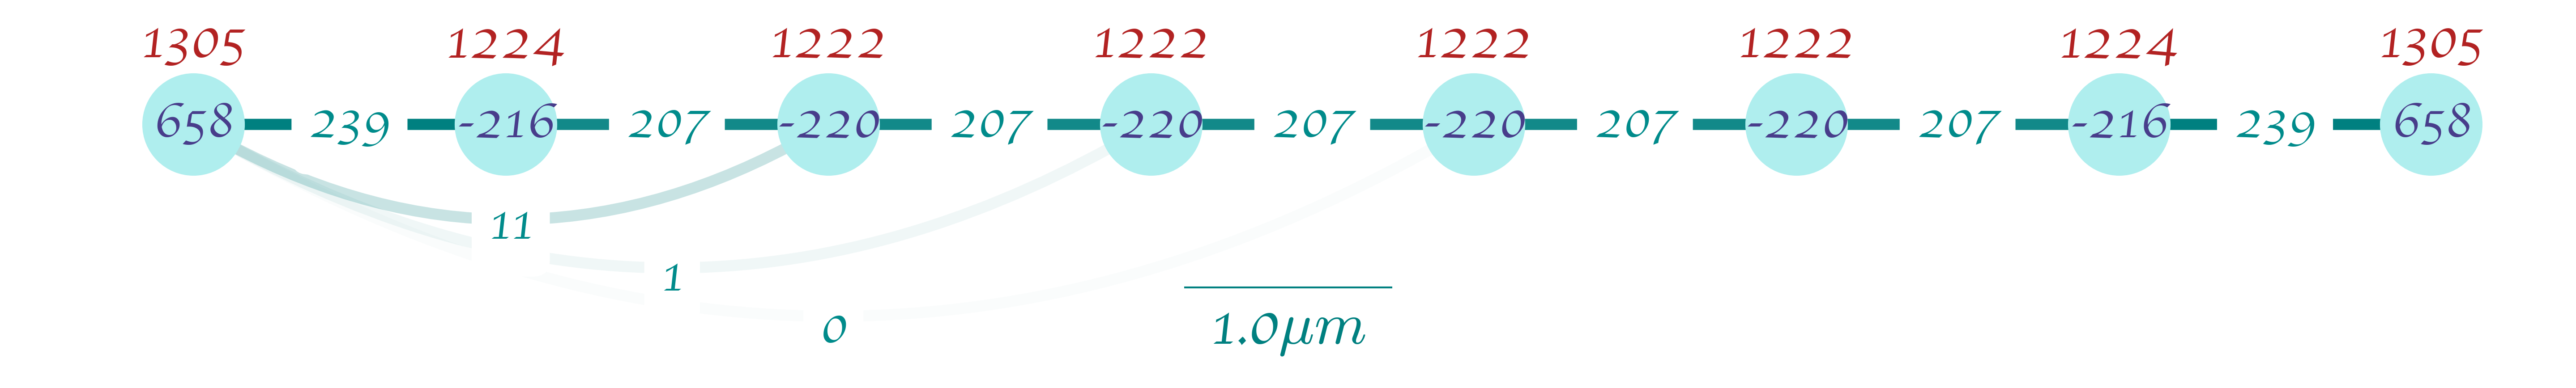

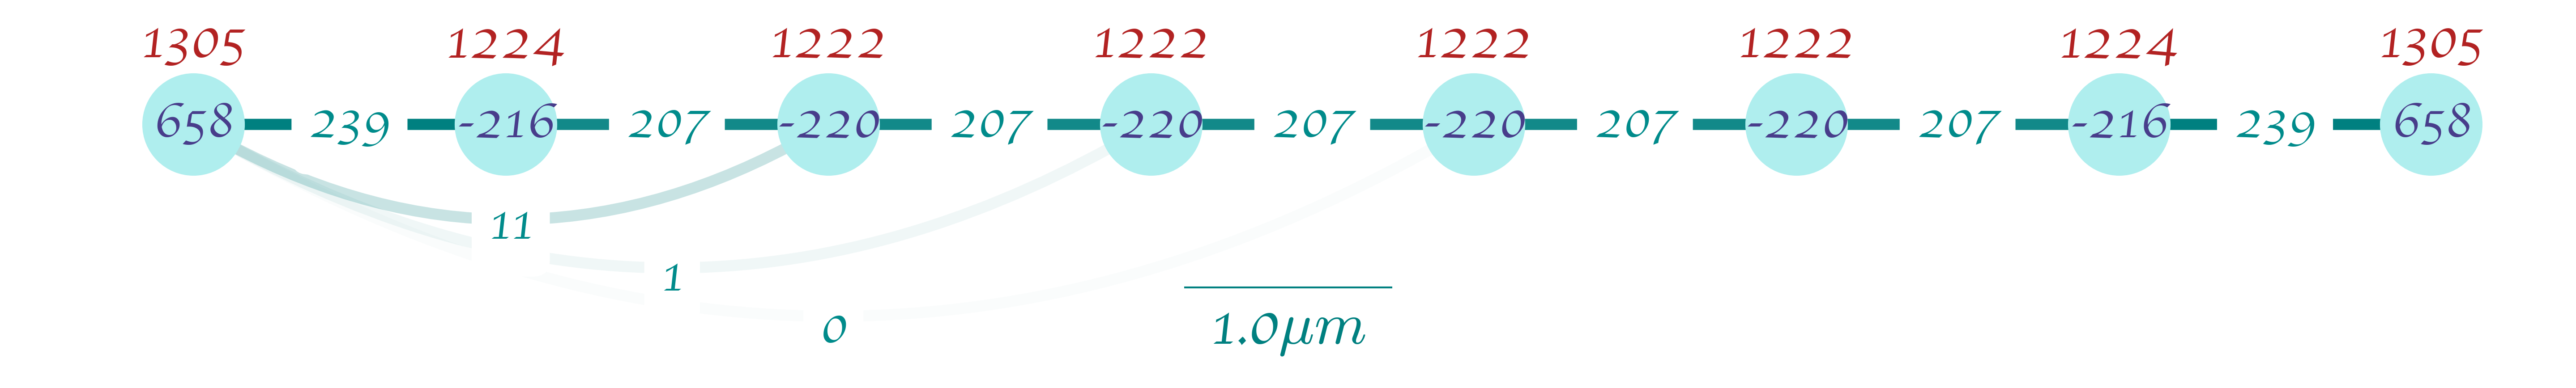

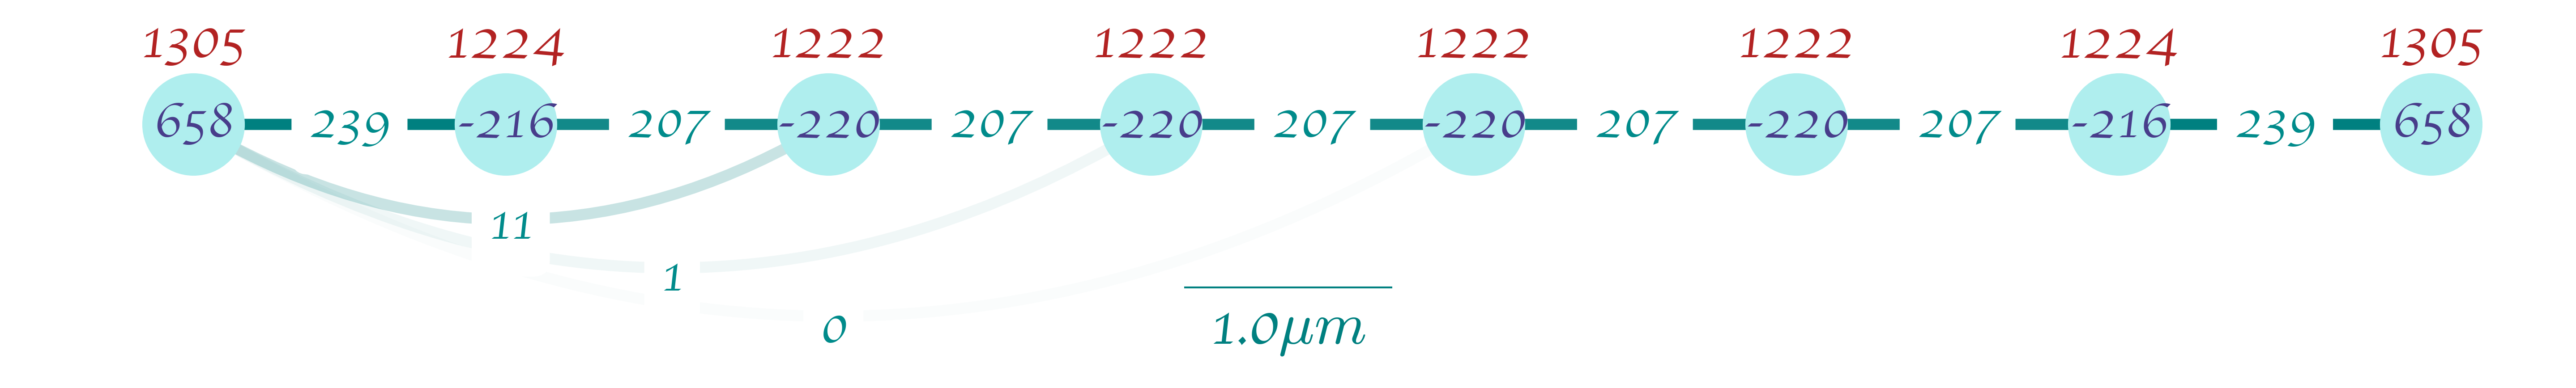

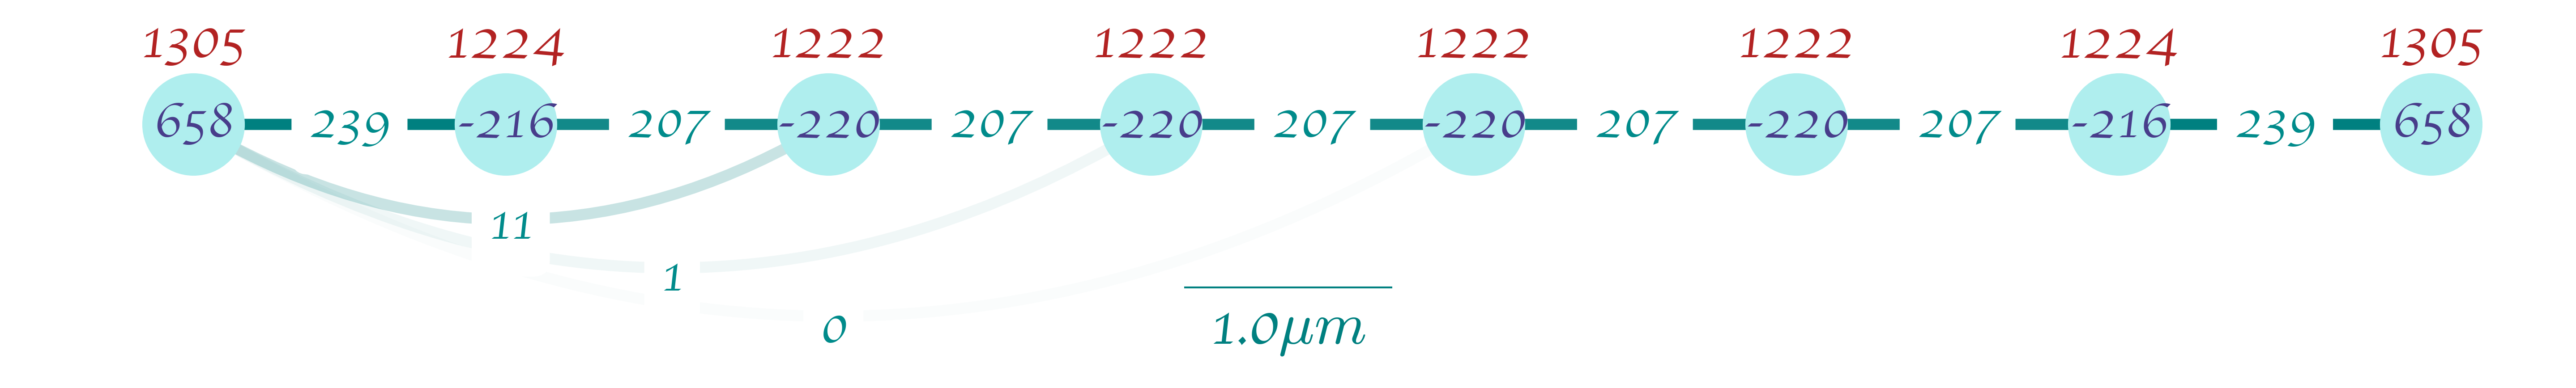

In [112]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

L = 8
Ly = 1
d = 3
shape = "square"
w = None
eqt = ""
A_list = []
t_list = []
V_list = []
U_list = []
for N in range(12, 24, 2):
    R0 = np.array([1, 1, 2.4]) * N * 3 / 20
    G = HubbardGraph(
        N,
        R0=R0,
        lattice=np.array([L, Ly], dtype=int),
        trap=(52.26, 1000),
        lc=(1550, 1600),
        ascatt=1770,
        laser=780,
        band=1,
        dim=d,
        sparse=True,
        shape=shape,
        equalize=False,
        verbosity=0,
    )

    fn = f"../../output/Hubbard/convergence/{d}D_{L}x1_{shape}_{w}_L_{N}.ini"
    report = rep.get_report(fn)
    G = read_file(report, G)
    G.draw_graph(nnn=True, A=G.A, U=G.U)
    A_list.append(G.A)
    t_list.append(abs(G.nn_tunneling(G.A)))
    V_list.append(abs(np.diag(G.A)))
    U_list.append(G.U)
print(f"V = {np.diag(G.A)}")
t = abs(G.nn_tunneling(G.A))
print(f"t = {t}")
print(f"U = {G.U}")
print(f"V_err = {G.v_cost_func(G.A, None)}")
print(f"t_err = {G.t_cost_func(G.A, None, None, None)}")
print(f"U_err = {G.u_cost_func(G.U, None)}")

[array([1.8 , 1.8 , 4.32]), array([2.1 , 2.1 , 5.04]), array([2.4 , 2.4 , 5.76]), array([2.7 , 2.7 , 6.48]), array([3. , 3. , 7.2]), array([3.3 , 3.3 , 7.92])]
R0x = 1.8 max_err A = 2.452310081005352e-06, max_err U = 8.967004368078025e-08 max_err = 2.452310081005352e-06
R0x = 2.1 max_err A = 8.133553975545687e-06, max_err U = 1.8539476633474203e-09 max_err = 8.133553975545687e-06
R0x = 2.4 max_err A = 7.144511196244209e-06, max_err U = 2.5612335779793232e-11 max_err = 7.144511196244209e-06
R0x = 2.7 max_err A = 9.866515099994476e-06, max_err U = -2.813654192880423e-12 max_err = 9.866515099994476e-06
R0x = 3.0 max_err A = 8.225915625349436e-06, max_err U = -2.4435034830575464e-12 max_err = 8.225915625349436e-06
R0x = 3.3 max_err A = 8.15798852567529e-06, max_err U = -2.313578221632236e-12 max_err = 8.15798852567529e-06


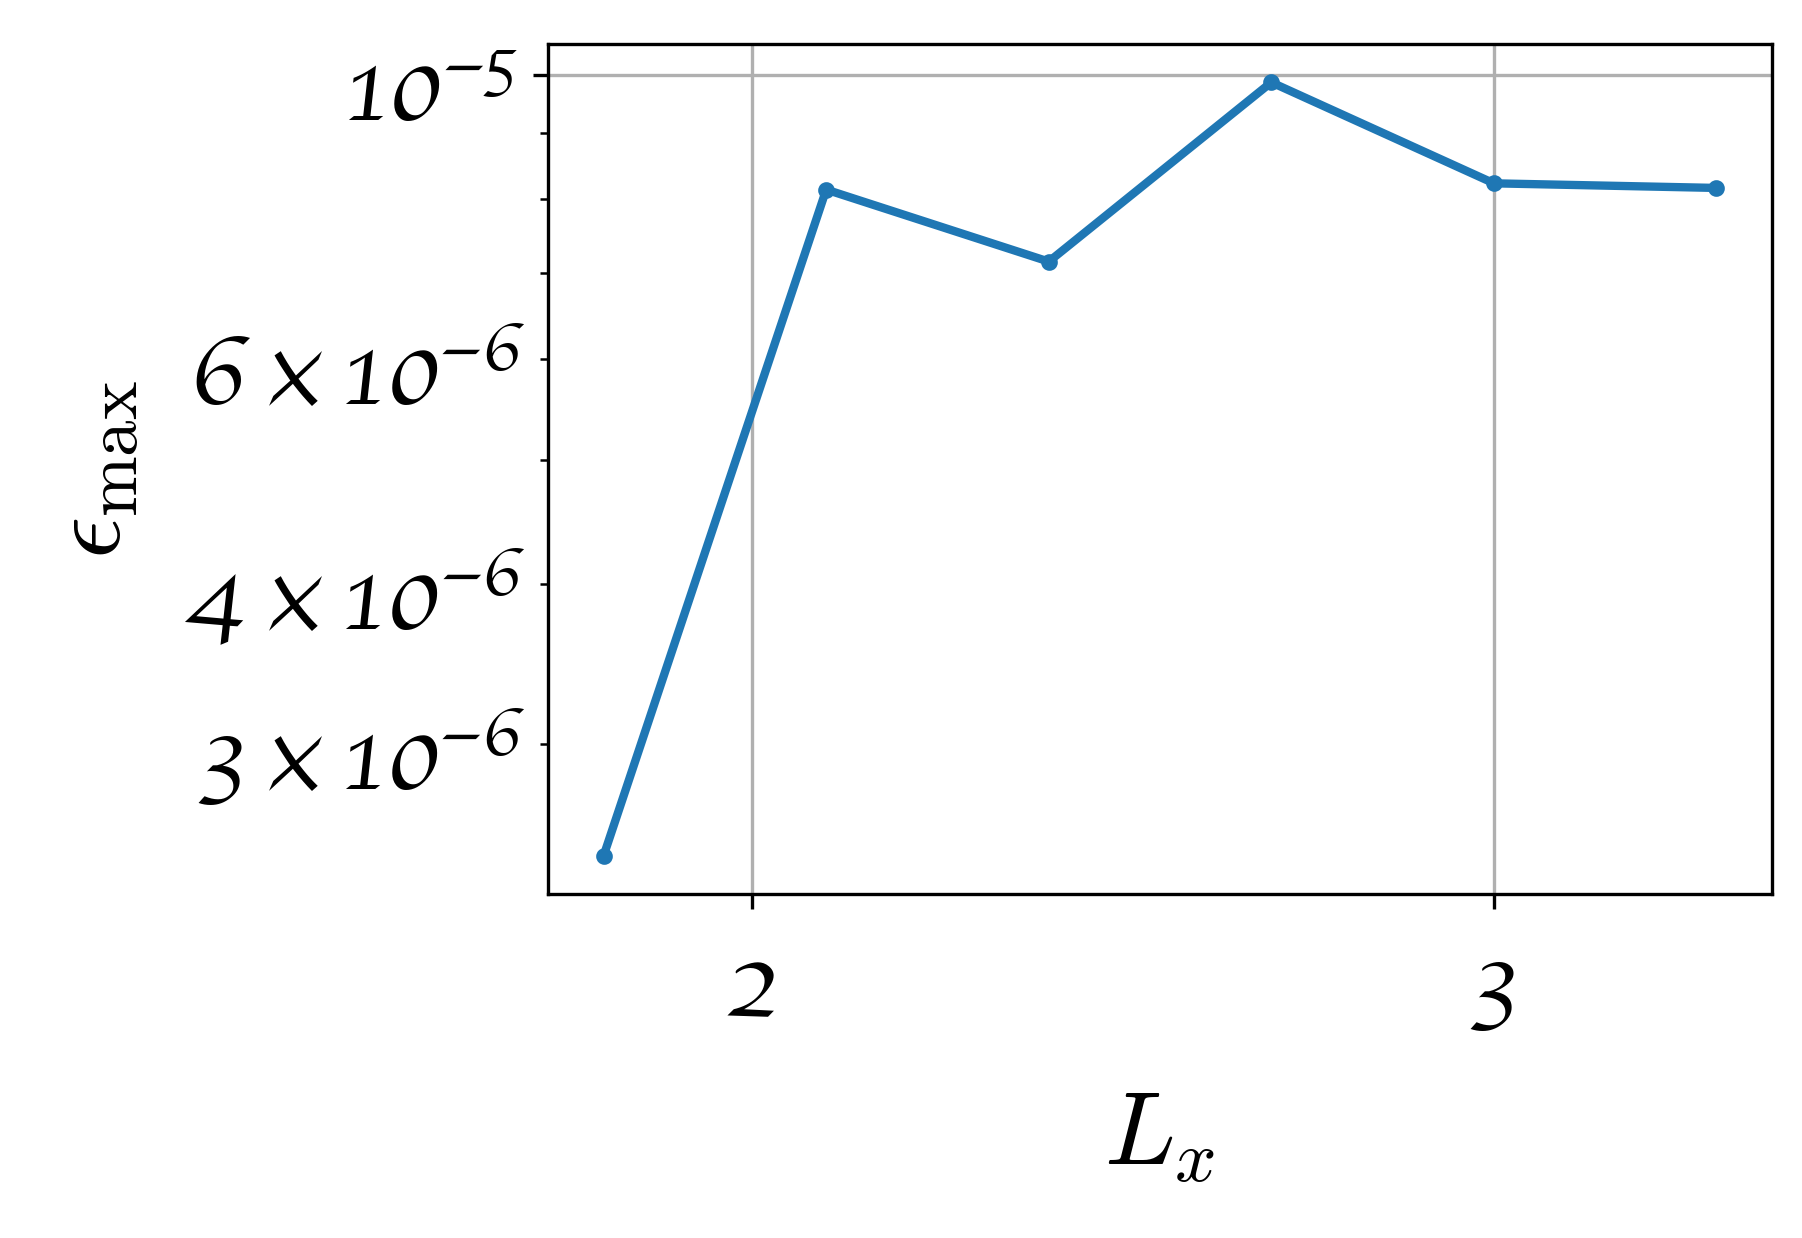

In [113]:
import matplotlib.pyplot as plt

size = 25
params = {
    "figure.figsize": (6, 4.5),
    "legend.fontsize": "xx-large",
    "axes.labelsize": size,
    "axes.titlesize": "xx-large",
    "xtick.labelsize": size,
    "ytick.labelsize": size,
}
plt.rcParams.update(params)
plt.gcf().subplots_adjust(bottom=0.25, left=0.22)

r = np.arange(12, 24, 2)
R0 = [np.array([1, 1, 2.4]) * N * 3 / 20 for N in r]
print(R0)
dx = r * 3 / 20

tarr = np.array(A_list)
Uarr = np.array(U_list)
Uinf = np.zeros_like(Uarr[0])
tinf = np.zeros_like(tarr[0])
fitrange = slice(-3, None)
for i in range(L):
    pU = np.polyfit(1 / dx[fitrange], np.log(Uarr[fitrange, i]), 1)
    Uinf[i] = np.exp(pU[1])
    for j in range(L):
        pt = np.polyfit(1 / dx[fitrange], np.log(abs(tarr[fitrange, i, j])), 1)
        tinf[i, j] = np.exp(pt[1])

max_err = np.zeros_like(dx)
for i in range(len(max_err)):
    met = np.max((abs(tarr[i]) - abs(tinf)) / abs(tinf))
    meu = np.max((abs(Uarr[i]) - abs(Uinf)) / abs(Uinf))
    me = max(met, meu)
    print(f"R0x = {dx[i]} max_err A = {met}, max_err U = {meu} max_err = {me}")
    max_err[i] = me
plt.plot(dx, max_err, ".-", lw=2)

plt.xlabel("$L_x$")
plt.ylabel("$\epsilon_\mathrm{max}$")
plt.yscale("log")
plt.grid()
plt.savefig("AppFig2.pdf")

Why error is not monotonically decaying? The problem is at the smallest quantity in the calculation $A_{81}\sim 10^{-7}$.

In [87]:
for i in range(L):
    print(abs(Uarr[:, i] - Uinf[i]) / abs(Uinf[i]))


[8.96700255e-08 1.85392928e-09 2.55951450e-11 4.28730338e-12
 3.74860335e-12 3.52205998e-12]
[5.33898286e-08 1.00596345e-09 1.15073742e-11 2.97316159e-12
 2.59133588e-12 2.44350313e-12]
[5.36172403e-08 1.01123684e-09 1.18904328e-11 2.81365419e-12
 2.44350348e-12 2.31357822e-12]
[5.36151535e-08 1.01097871e-09 1.17884702e-11 2.90677595e-12
 2.51462650e-12 2.39142107e-12]
[5.36151416e-08 1.01096708e-09 1.17764768e-11 2.91767908e-12
 2.52589308e-12 2.40014358e-12]
[5.36172320e-08 1.01122612e-09 1.18818923e-11 2.82092274e-12
 2.45059032e-12 2.31939306e-12]
[5.33898166e-08 1.00595438e-09 1.14959467e-11 2.98422637e-12
 2.59841009e-12 2.45293540e-12]
[8.96700437e-08 1.85394766e-09 2.56123358e-11 4.27096367e-12
 3.73175302e-12 3.50895417e-12]


In [104]:
tarr[:, 0, 7]

array([1.12066246e-07, 1.12066883e-07, 1.12066772e-07, 1.12067077e-07,
       1.12066892e-07, 1.12066885e-07])

In [105]:
for i in range(L):
    for j in range(L):
        print(i, j, (abs(tarr[:, i, j]) - abs(tinf[i, j])) / abs(tinf[i, j]))

0 0 [6.04161100e-08 1.22520534e-09 2.79759869e-11 4.00225574e-12
 3.48413818e-12 3.28984410e-12]
0 1 [-2.61510230e-08 -6.02407957e-10 -1.44856482e-11 -1.26761036e-12
 -8.65050575e-13 -1.07295075e-12]
0 2 [-8.82701734e-08 -2.12866503e-09 -9.73087553e-11 -6.16400265e-11
 -5.62606091e-11 -5.03321954e-11]
0 3 [-1.43165647e-07 -3.33638333e-09  1.50833191e-11  2.07997486e-11
  7.17725897e-12  1.85105952e-11]
0 4 [-1.98523808e-07 -4.75616000e-09  7.29468384e-10  9.97199414e-10
  2.20079882e-11  9.29182341e-10]
0 5 [-2.69696393e-07 -3.21183799e-08 -2.76673700e-08 -3.63022931e-08
 -2.35665319e-08 -3.08802040e-08]
0 6 [-6.46931550e-07 -3.99379167e-07 -3.51482229e-07 -4.55432407e-07
 -3.98174732e-07 -3.74142473e-07]
0 7 [2.45231008e-06 8.13355398e-06 7.14451120e-06 9.86651510e-06
 8.21998836e-06 8.15798853e-06]
1 0 [-2.61509805e-08 -6.02368932e-10 -1.44404676e-11 -1.22614647e-12
 -8.24864284e-13 -1.03926860e-12]
1 1 [5.99338070e-08 1.21187813e-09 2.81393988e-11 4.85627847e-12
 3.87386833e-12 4.03

Text(0, 0.5, '$A_{18}$')

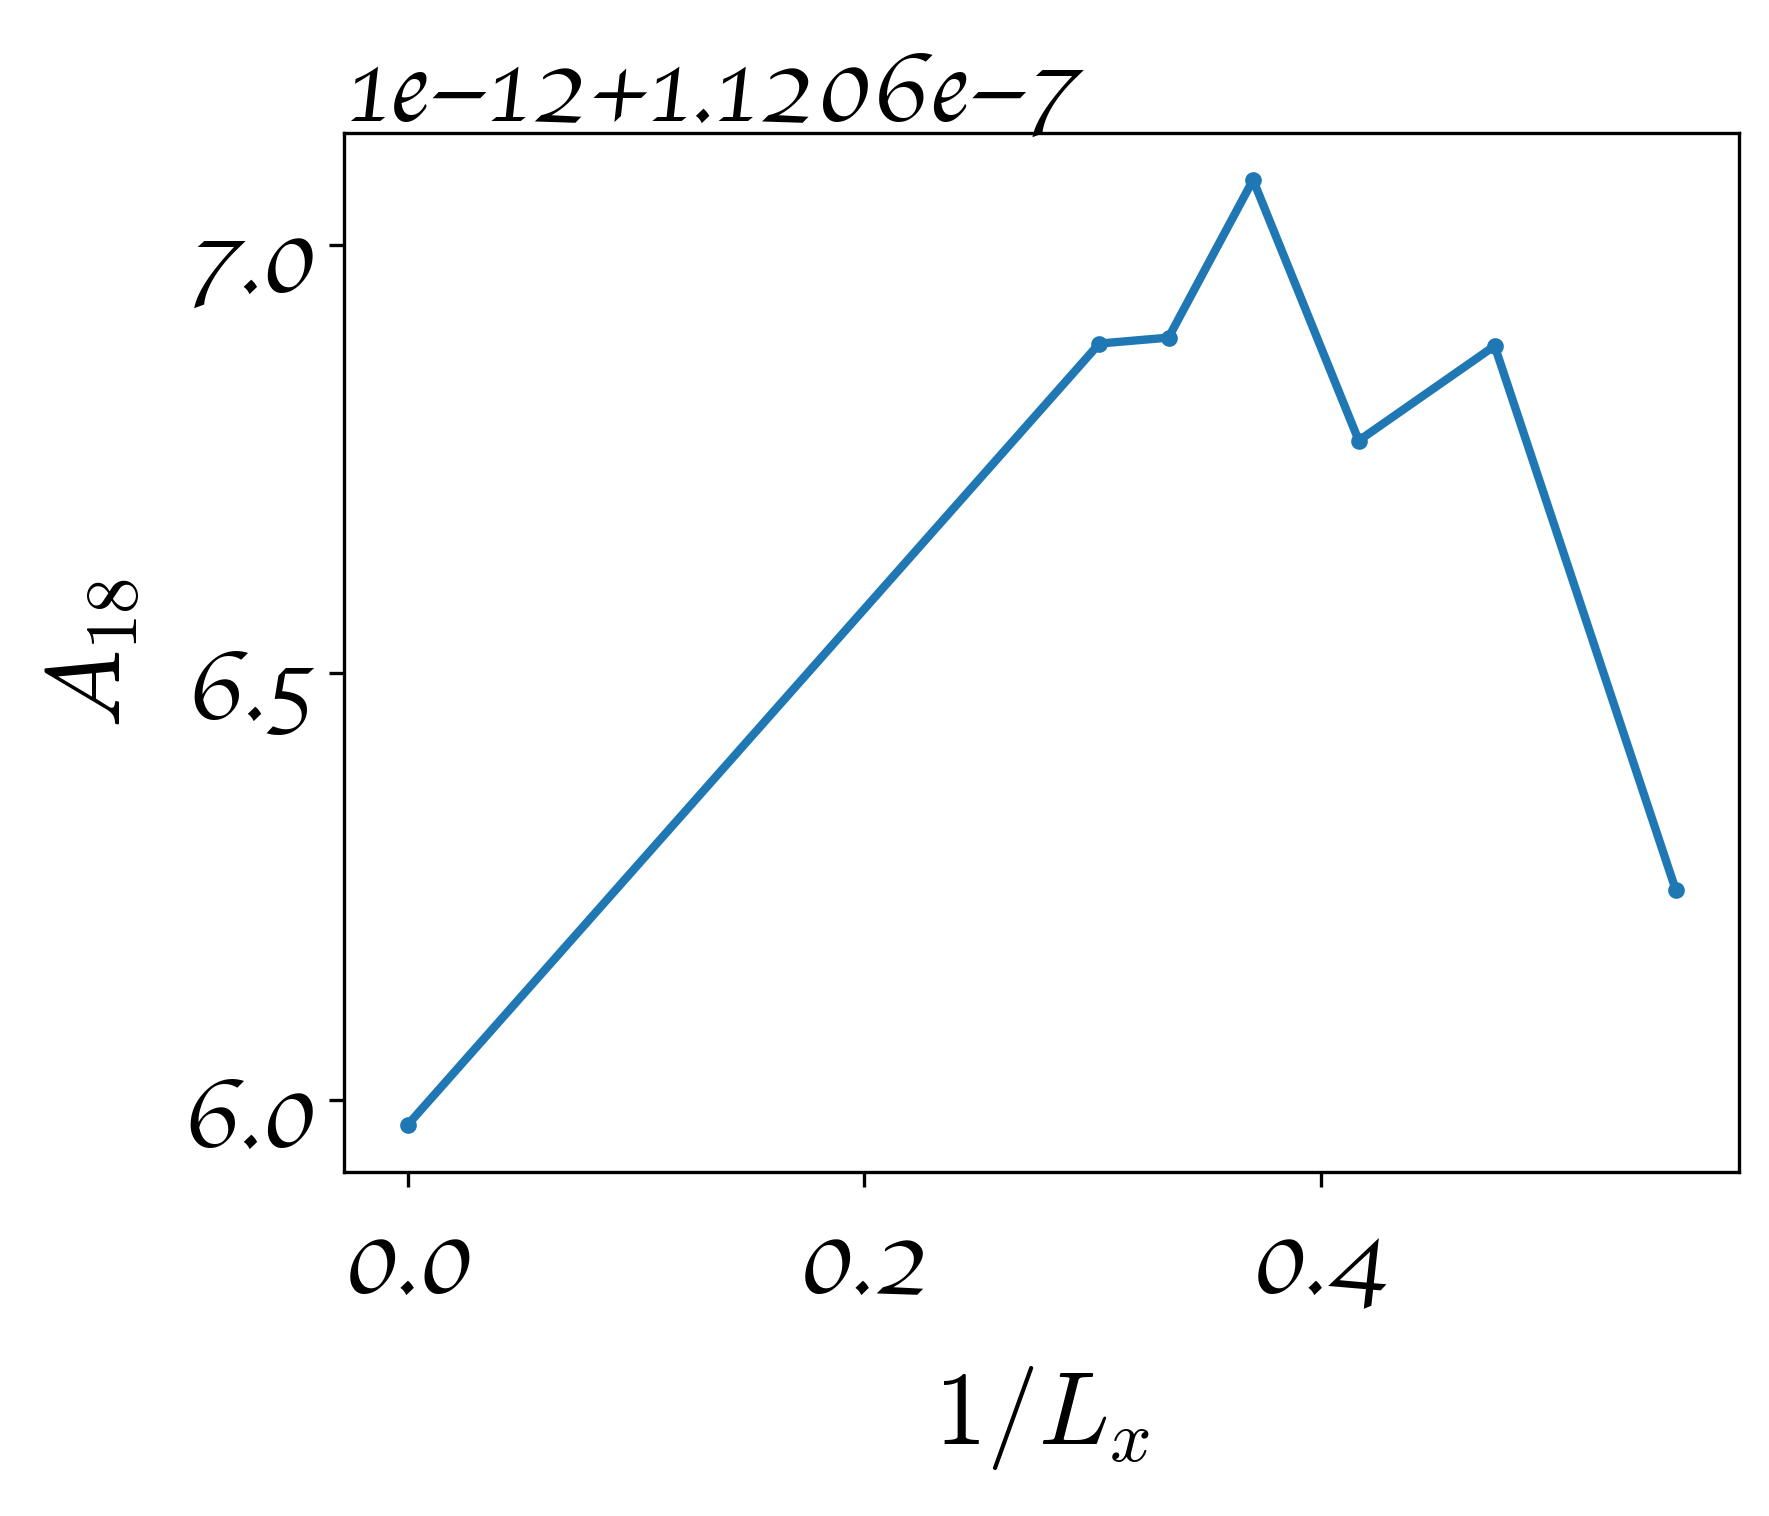

In [106]:
Aplot = tarr[:, 0, 7]
Aplot = np.append(Aplot, tinf[0, 7])
dxplot = np.append(1 / dx, 0)
plt.plot(dxplot, Aplot, ".-", lw=2)
plt.xlabel("$1/L_x$")
plt.ylabel("$A_{18}$")


Text(0, 0.5, '$U_{1}$')

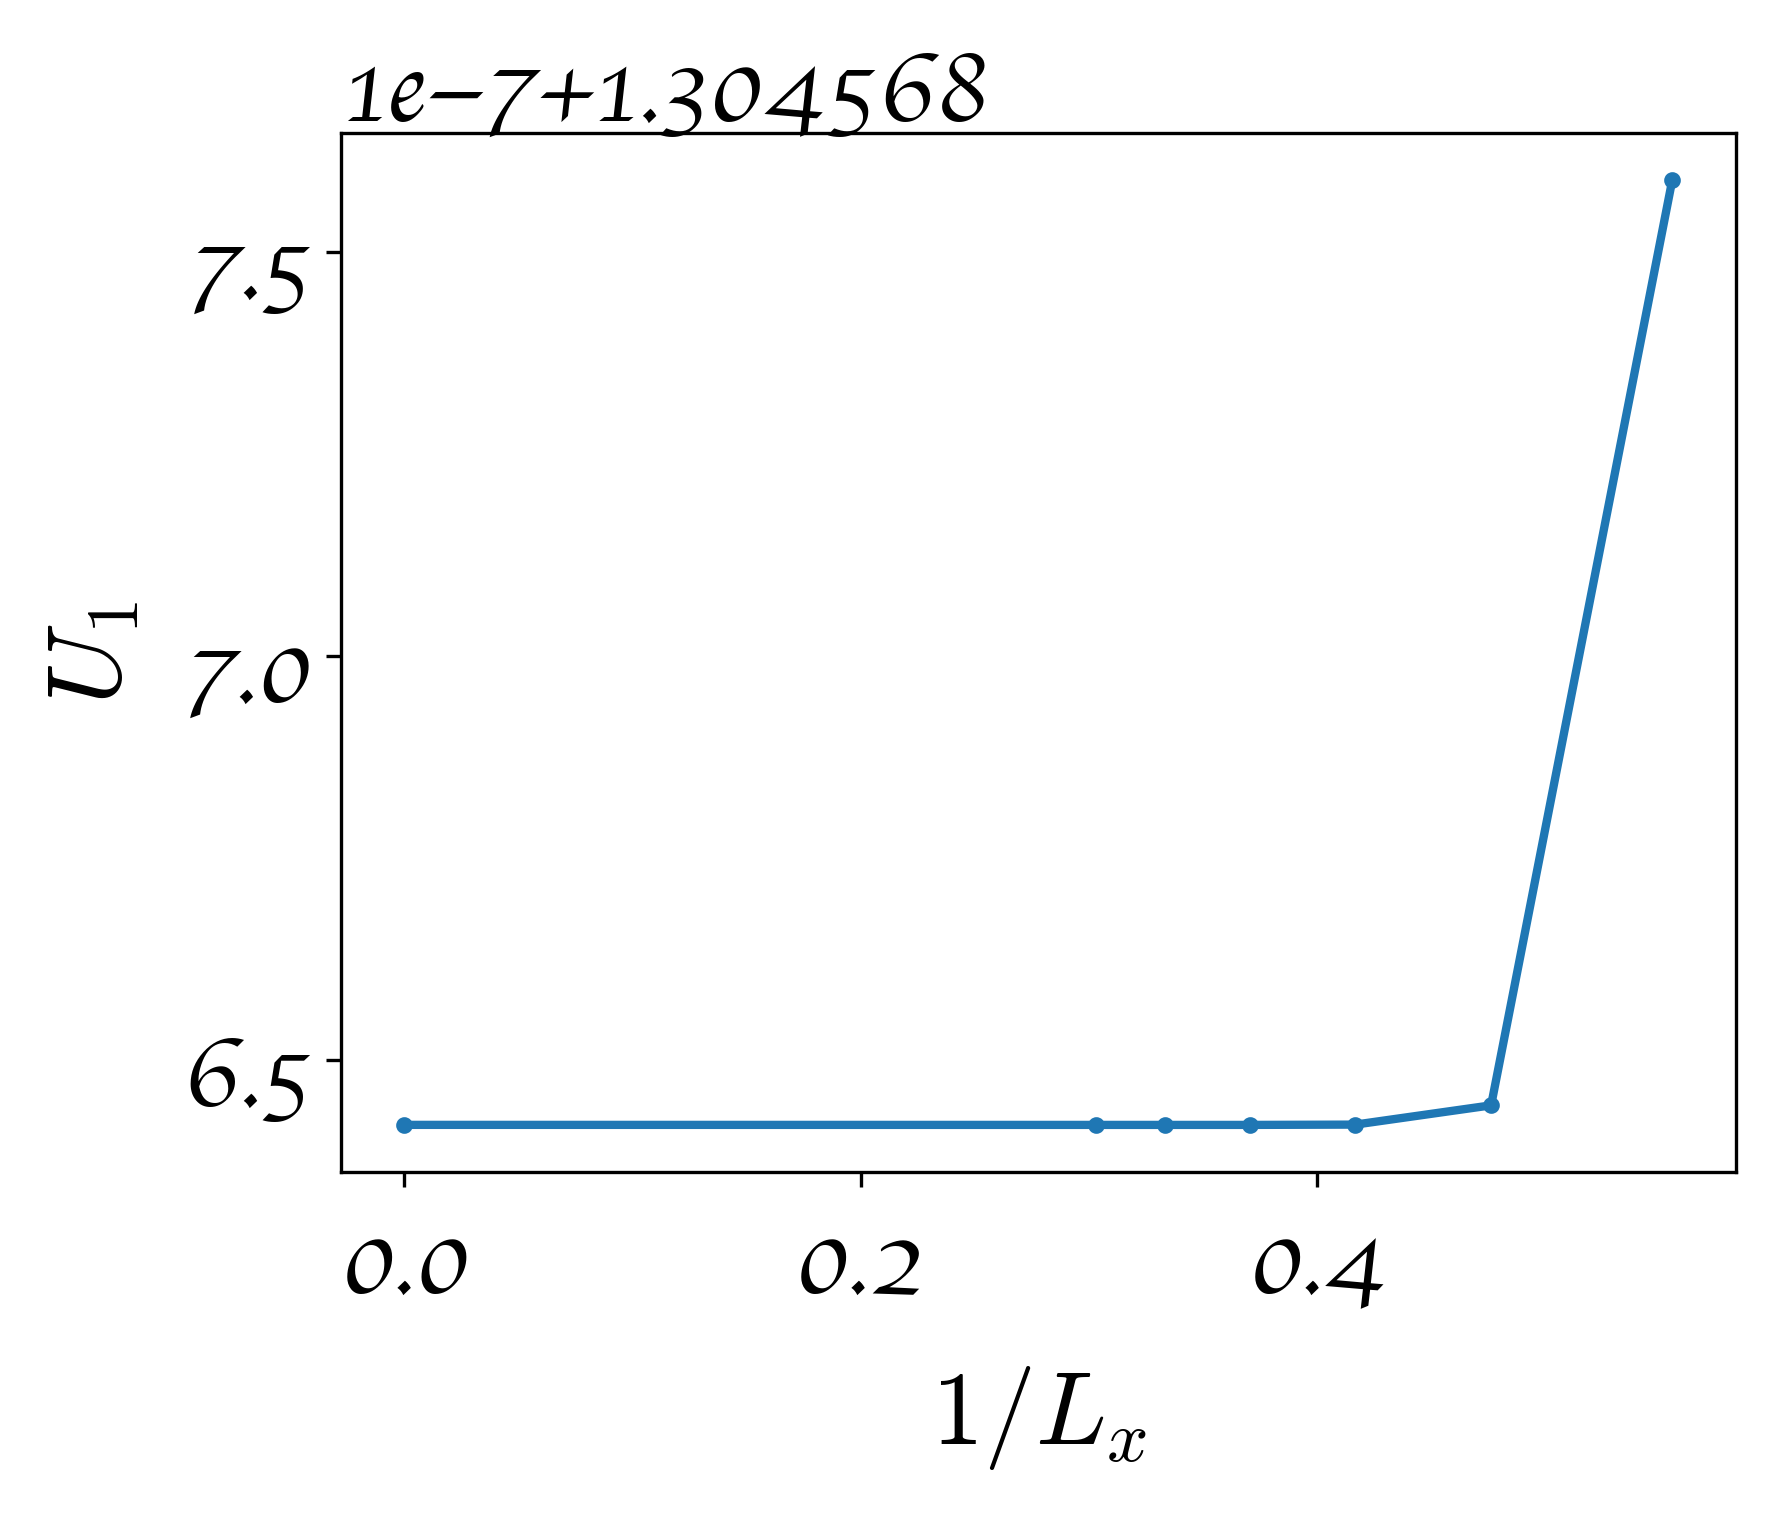

In [107]:
Uplot = Uarr[:, 0]
Uplot = np.append(Uplot, Uinf[0])
dxplot = np.append(1 / dx, 0)
plt.plot(dxplot, Uplot, ".-", lw=2)
plt.xlabel("$1/L_x$")
plt.ylabel("$U_{1}$")


Solution: calculate t,V,U individually

[array([1.8 , 1.8 , 4.32]), array([2.1 , 2.1 , 5.04]), array([2.4 , 2.4 , 5.76]), array([2.7 , 2.7 , 6.48]), array([3. , 3. , 7.2]), array([3.3 , 3.3 , 7.92])]
R0x = 1.8 max_err t = -2.615102302423282e-08, max_err V = 6.066449614687365e-08, max_err U = 8.967004368078025e-08 max_err = 8.967004368078025e-08
R0x = 2.1 max_err t = -6.024079566542374e-10, max_err V = 1.2335598798601737e-09, max_err U = 1.8539476633474203e-09 max_err = 1.8539476633474203e-09
R0x = 2.4 max_err t = -1.4485648189873642e-11, max_err V = 2.927762673359738e-11, max_err U = 2.5612335779793232e-11 max_err = 2.927762673359738e-11
R0x = 2.7 max_err t = -1.2676103619650491e-12, max_err V = 5.090207710863671e-12, max_err U = -2.813654192880423e-12 max_err = 5.090207710863671e-12
R0x = 3.0 max_err t = -8.650505750335061e-13, max_err V = 4.896966014277249e-12, max_err U = -2.4435034830575464e-12 max_err = 4.896966014277249e-12
R0x = 3.3 max_err t = -1.072950753512289e-12, max_err V = 4.123999227931565e-12, max_err U = -2.

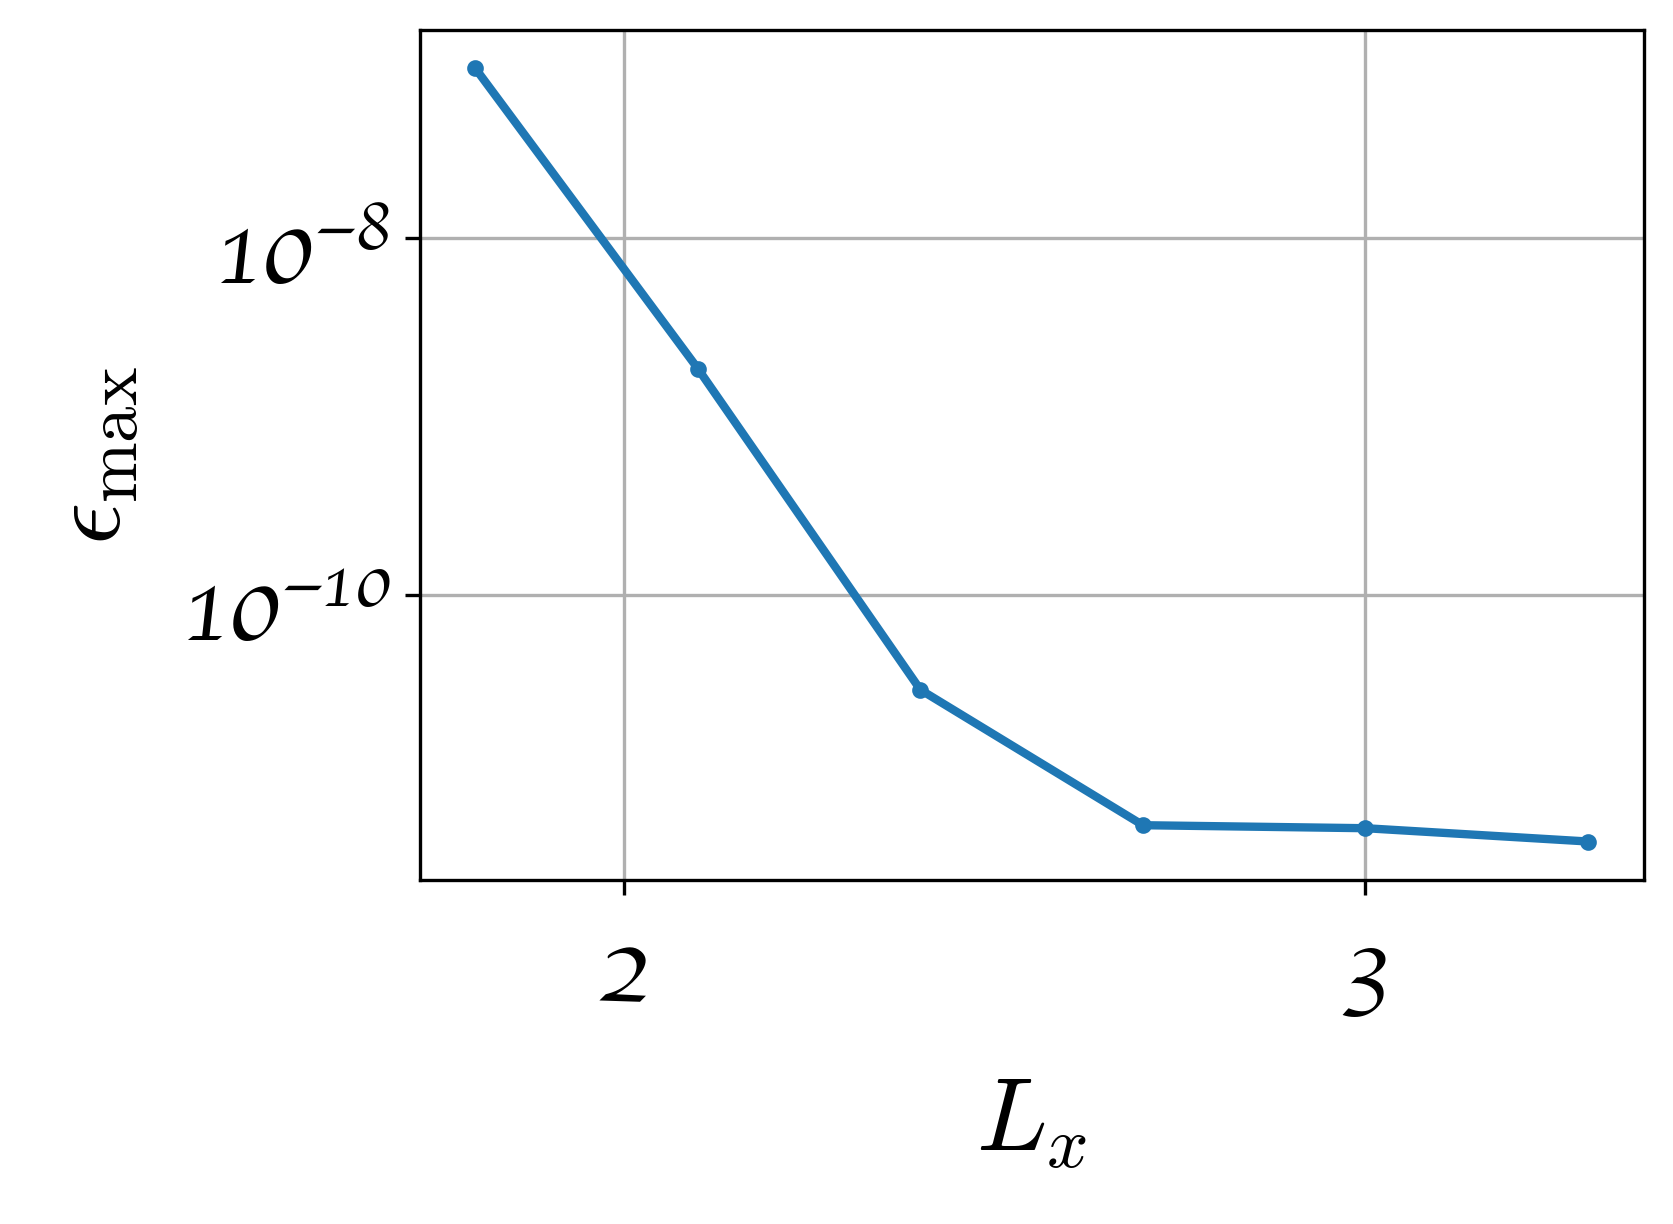

In [116]:
import matplotlib.pyplot as plt

size = 25
params = {
    "figure.figsize": (6, 4.5),
    "legend.fontsize": "xx-large",
    "axes.labelsize": size,
    "axes.titlesize": "xx-large",
    "xtick.labelsize": size,
    "ytick.labelsize": size,
}
plt.rcParams.update(params)
plt.gcf().subplots_adjust(bottom=0.25, left=0.22)

r = np.arange(12, 24, 2)
R0 = [np.array([1, 1, 2.4]) * N * 3 / 20 for N in r]
print(R0)
dx = r * 3 / 20

tarr = np.array(t_list)
Varr = np.array(V_list)
Uarr = np.array(U_list)
Uinf = np.zeros_like(Uarr[0])
tinf = np.zeros_like(tarr[0])
Vinf = np.zeros_like(Varr[0])
fitrange = slice(-3, None)
for i in range(L):
    pU = np.polyfit(1 / dx[fitrange], np.log(Uarr[fitrange, i]), 1)
    Uinf[i] = np.exp(pU[1])
    pV = np.polyfit(1 / dx[fitrange], np.log(Varr[fitrange, i]), 1)
    Vinf[i] = np.exp(pV[1])
for j in range(len(tinf)):
    pt = np.polyfit(1 / dx[fitrange], np.log(abs(tarr[fitrange, j])), 1)
    tinf[j] = np.exp(pt[1])

max_err = np.zeros_like(dx)
for i in range(len(max_err)):
    met = np.max((abs(tarr[i]) - abs(tinf)) / abs(tinf))
    mev = np.max((abs(Varr[i]) - abs(Vinf)) / abs(Vinf))
    meu = np.max((abs(Uarr[i]) - abs(Uinf)) / abs(Uinf))
    me = max(mev, meu, met)
    print(
        f"R0x = {dx[i]} max_err t = {met}, max_err V = {mev}, max_err U = {meu} max_err = {me}"
    )
    max_err[i] = me
plt.plot(dx, max_err, ".-", lw=2)

plt.xlabel("$L_x$")
plt.ylabel("$\epsilon_\mathrm{max}$")
plt.yscale("log")
plt.grid()
plt.savefig("AppFig2.pdf")

## Convergence of $U$ integrals

Wannier: Number of integration grid set to 65.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.
Wannier: Number of integration grid set to 100.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.
Wannier: Number of integration grid set to 129.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.
Wannier: Number of integration grid set to 150.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.
Wannier: Number of integration grid set to 175.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: sc

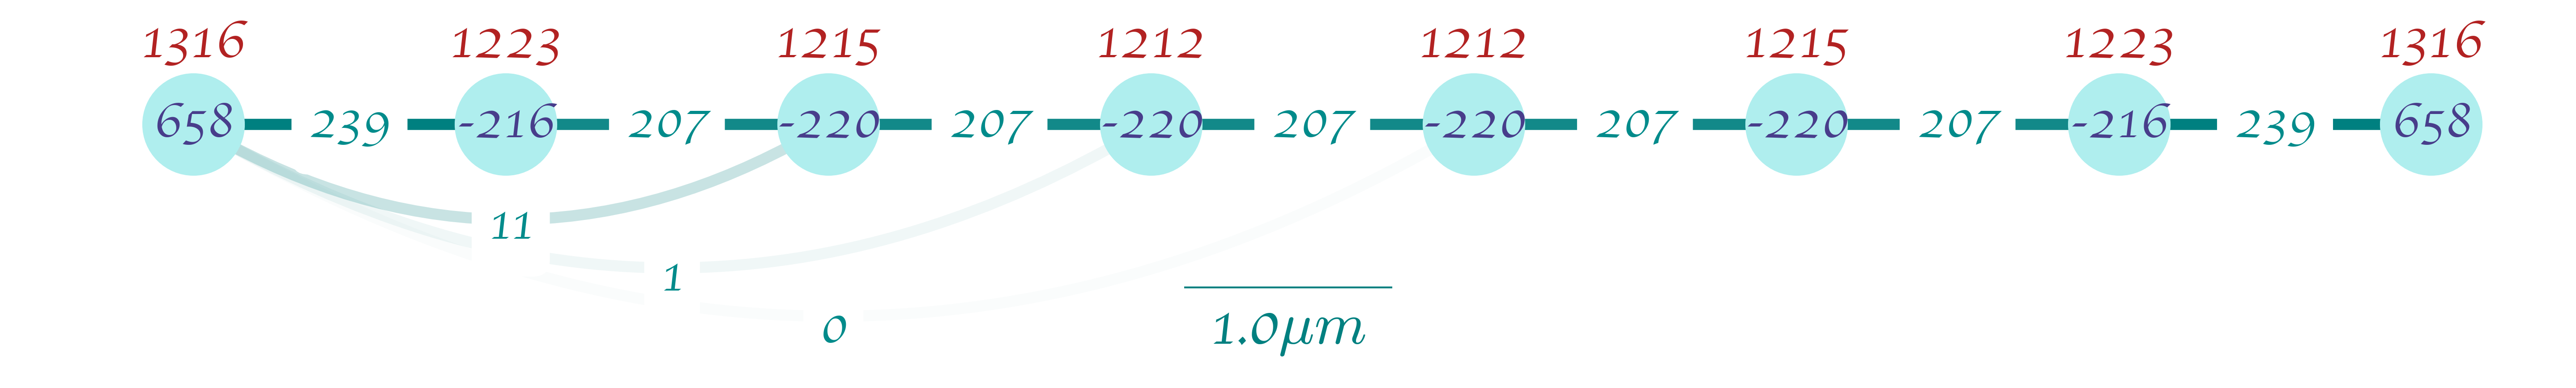

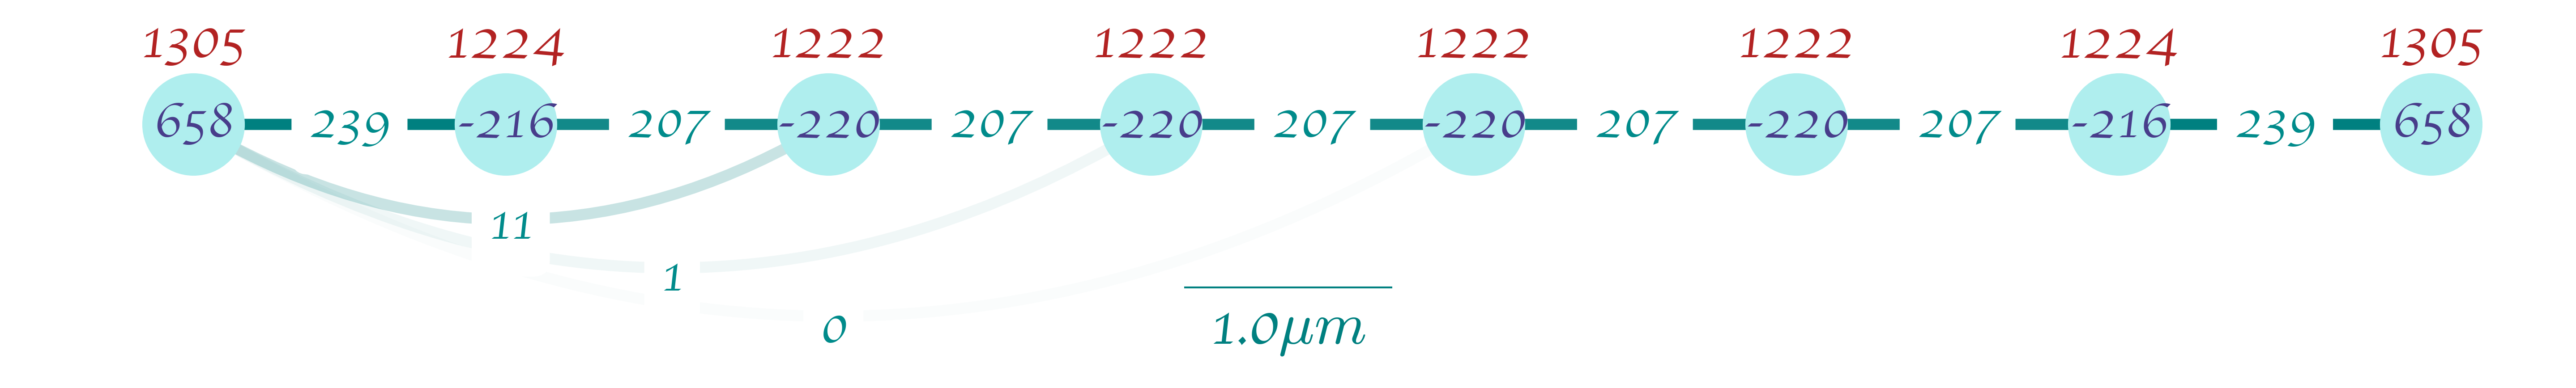

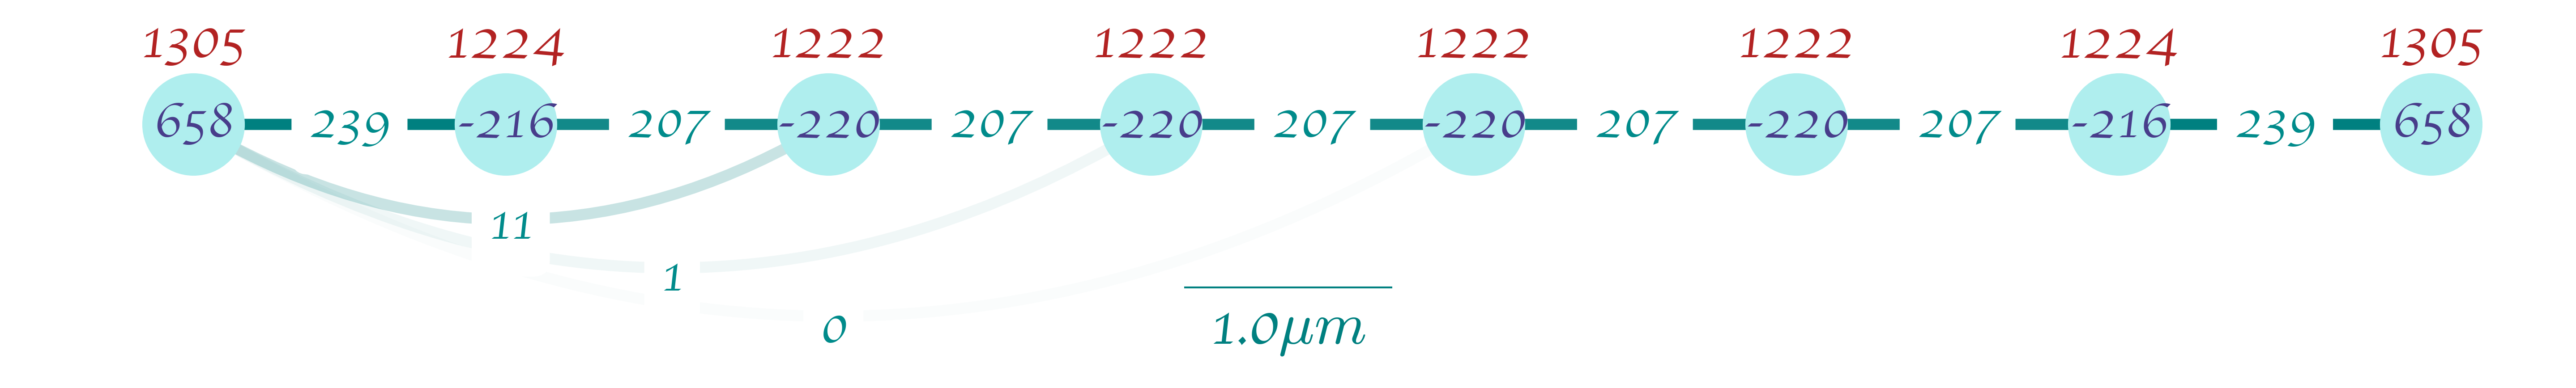

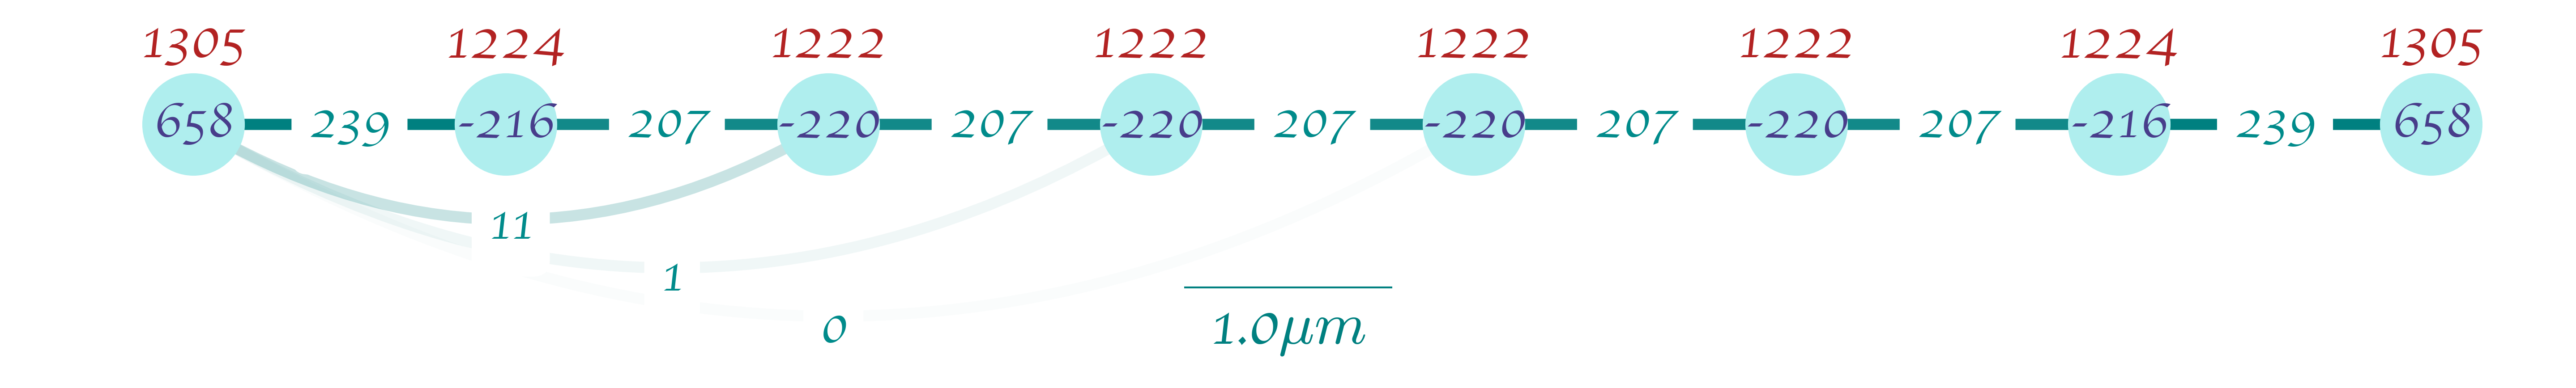

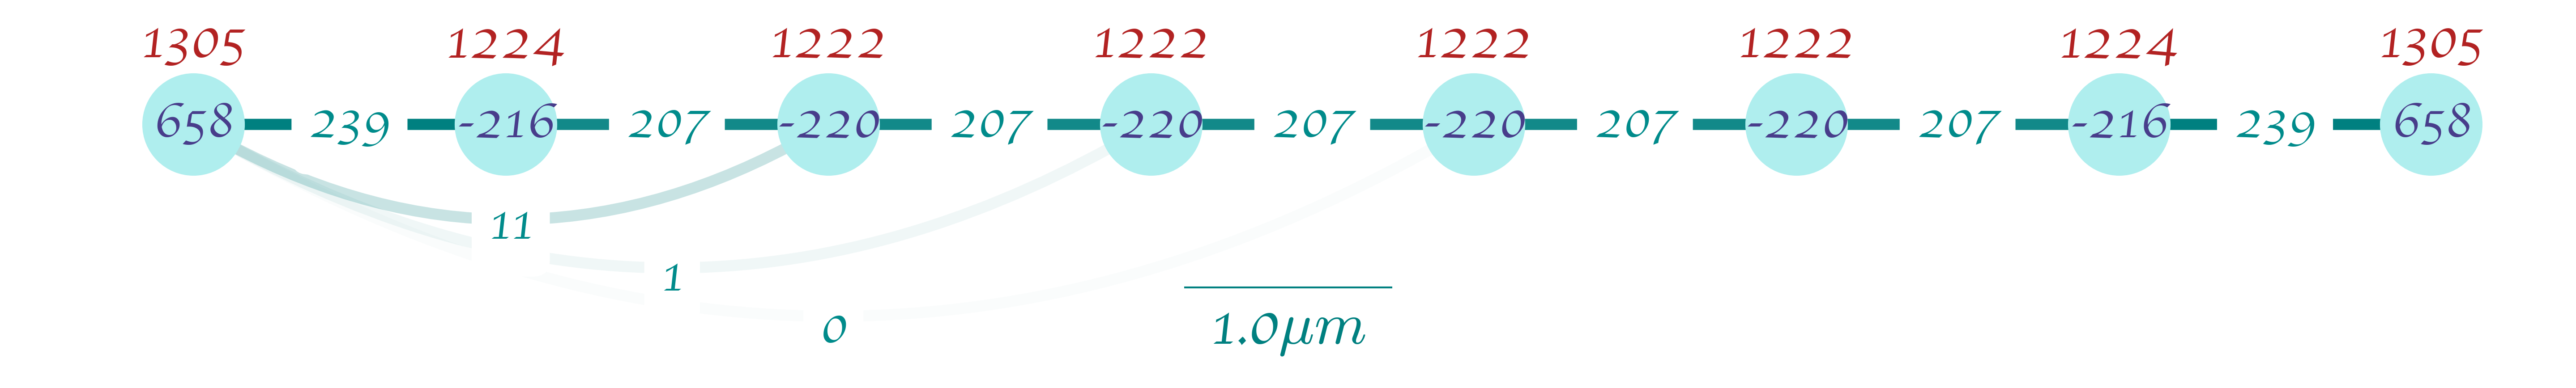

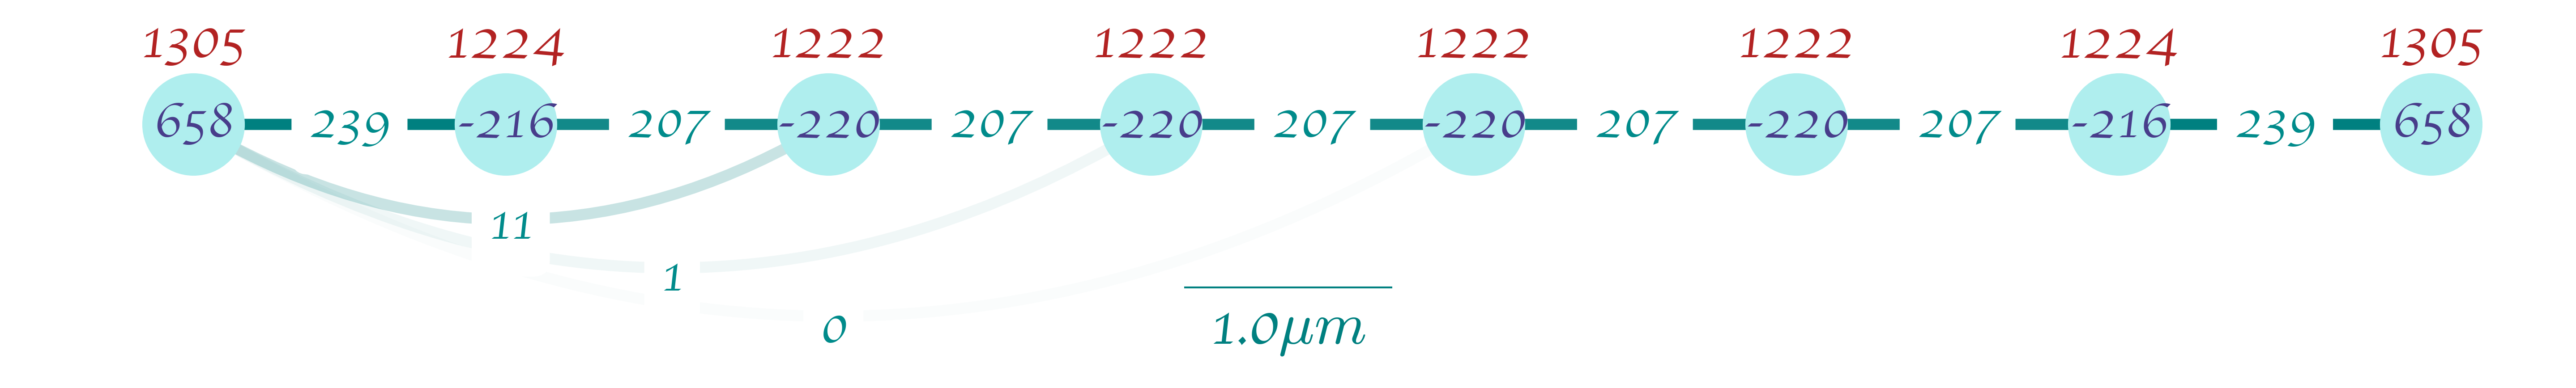

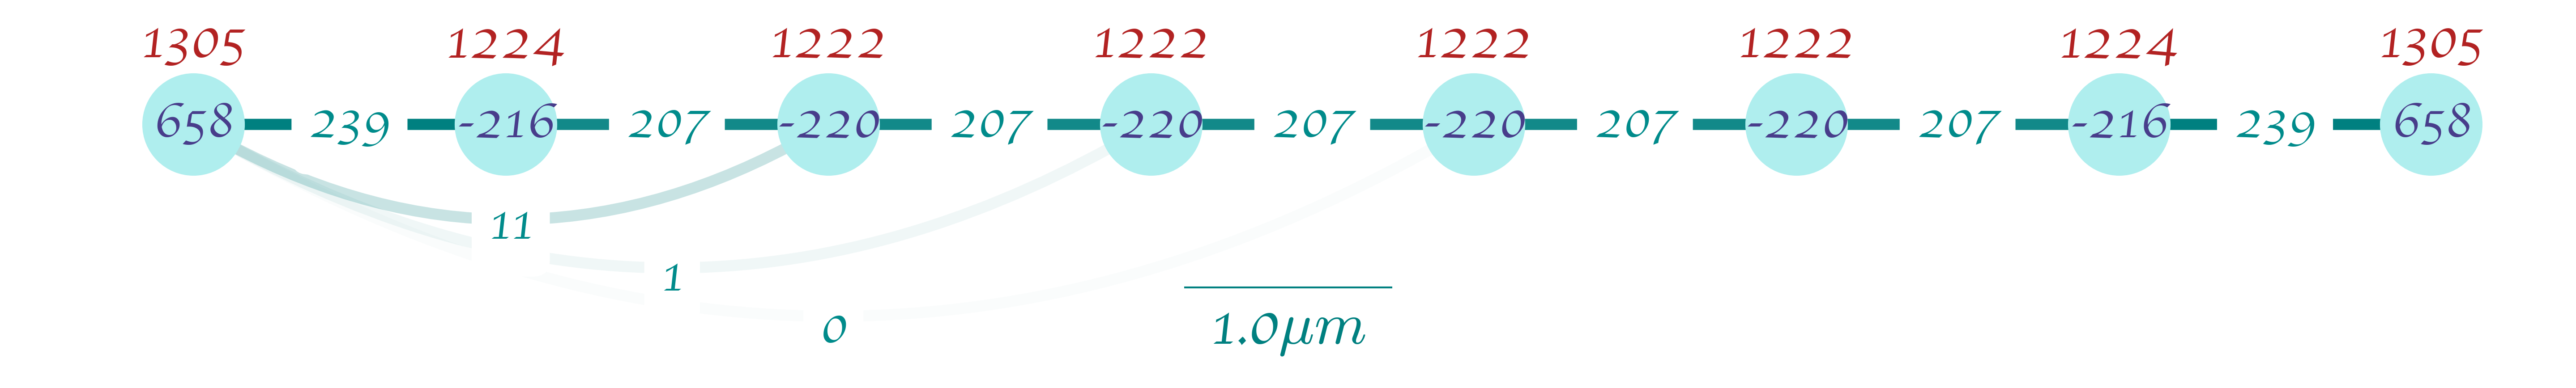

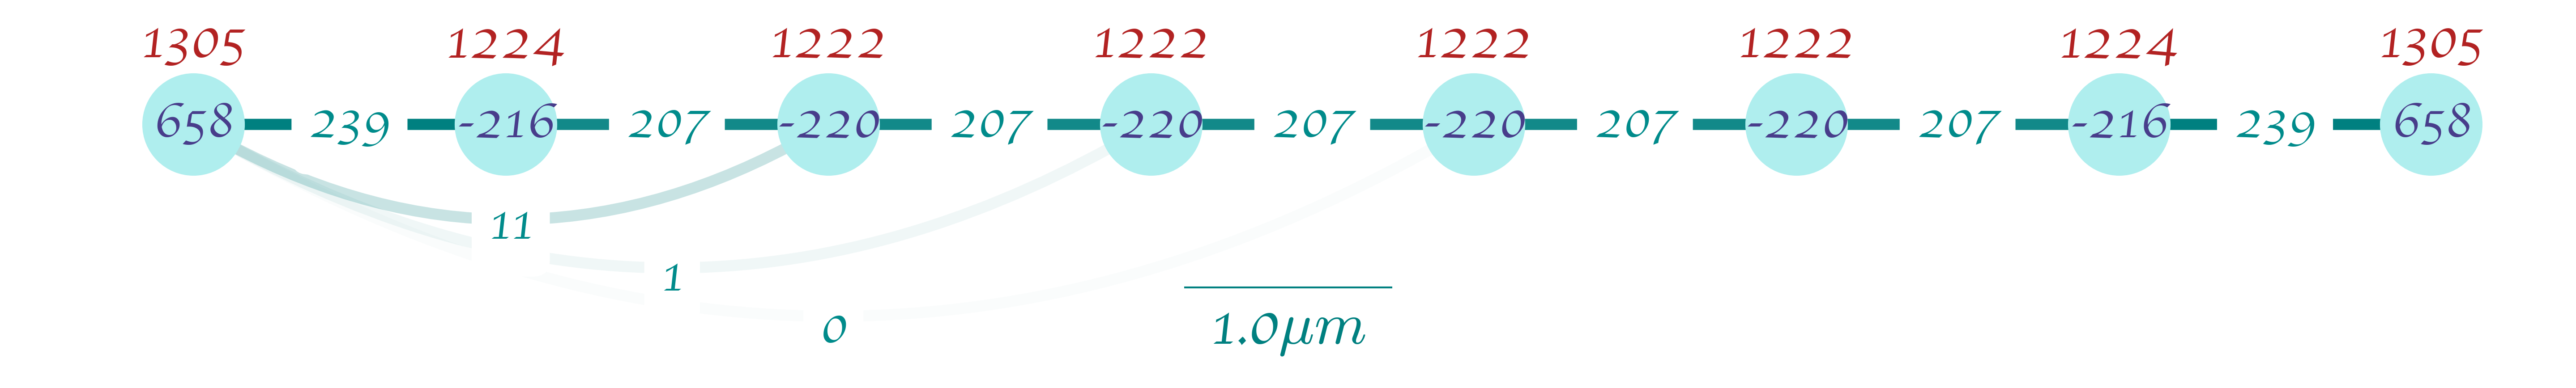

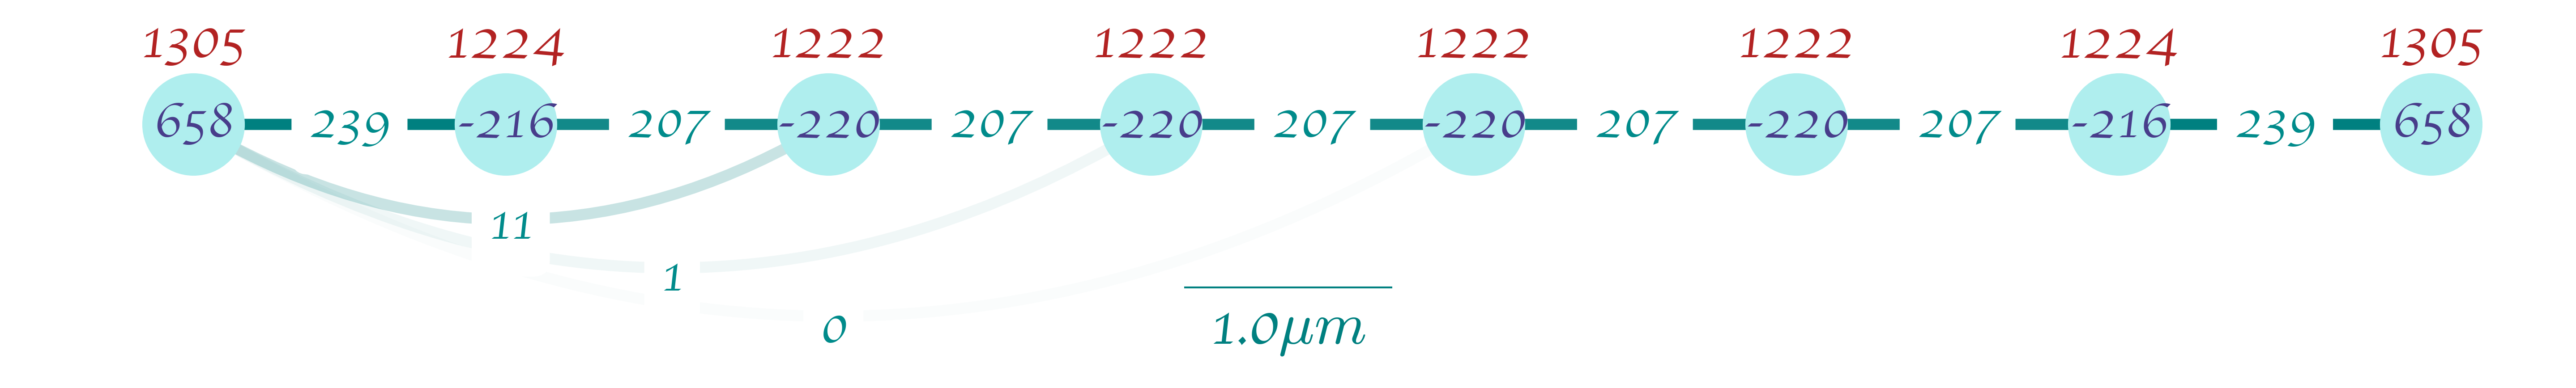

In [94]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *


L = 8
Ly = 1
d = 3
shape = "square"
w = None
eqt = ""
R0 = np.array([3, 3, 7.2])
A_list = []
U_list = []
for ig in [65, 100, 129, 150, 175, 200, 225, 257, 300]:
    G = HubbardGraph(
        N=20,
        R0=R0,
        lattice=np.array([L, Ly], dtype=int),
        trap=(52.26, 1000),
        lc=(1550, 1600),
        ascatt=1770,
        laser=780,
        band=1,
        dim=d,
        Nintgrl_grid=ig,
        sparse=True,
        shape=shape,
        equalize=False,
        verbosity=0,
    )

    fn = f"../../output/Hubbard/convergence/{d}D_{L}x1_{shape}_{w}_ig_{ig}.ini"
    report = rep.get_report(fn)
    G = read_file(report, G)
    G.draw_graph(nnn=True, A=G.A, U=G.U)
    A_list.append(G.A)
    U_list.append(G.U)
print(f"V = {np.diag(G.A)}")
t = abs(G.nn_tunneling(G.A))
print(f"t = {t}")
print(f"U = {G.U}")
print(f"V_err = {G.v_cost_func(G.A, None)}")
print(f"t_err = {G.t_cost_func(G.A, None, None, None)}")
print(f"U_err = {G.u_cost_func(G.U, None)}")


R0x = 65.0 max_err A = 1.0628831003430035e-14, max_err U = 0.008944394075596248 max_err = 0.008944394075596248
R0x = 100.0 max_err A = 1.0628831003430035e-14, max_err U = 2.3789868097188218e-05 max_err = 2.3789868097188218e-05
R0x = 129.0 max_err A = 1.0628831003430035e-14, max_err U = 2.2999433109311182e-08 max_err = 2.2999433109311182e-08
R0x = 150.0 max_err A = 1.0628831003430035e-14, max_err U = 1.456156268061574e-10 max_err = 1.456156268061574e-10
R0x = 175.0 max_err A = 1.0628831003430035e-14, max_err U = 1.5591031371075323e-13 max_err = 1.5591031371075323e-13
R0x = 200.0 max_err A = 1.0628831003430035e-14, max_err U = 7.489036837798723e-15 max_err = 7.489036837798723e-15
R0x = 225.0 max_err A = 1.0628831003430035e-14, max_err U = 6.978420689766991e-15 max_err = 6.978420689766991e-15
R0x = 257.0 max_err A = 1.0628831003430035e-14, max_err U = 5.616777628349042e-15 max_err = 5.616777628349042e-15
R0x = 300.0 max_err A = 1.0628831003430035e-14, max_err U = 5.276366862994555e-15 max

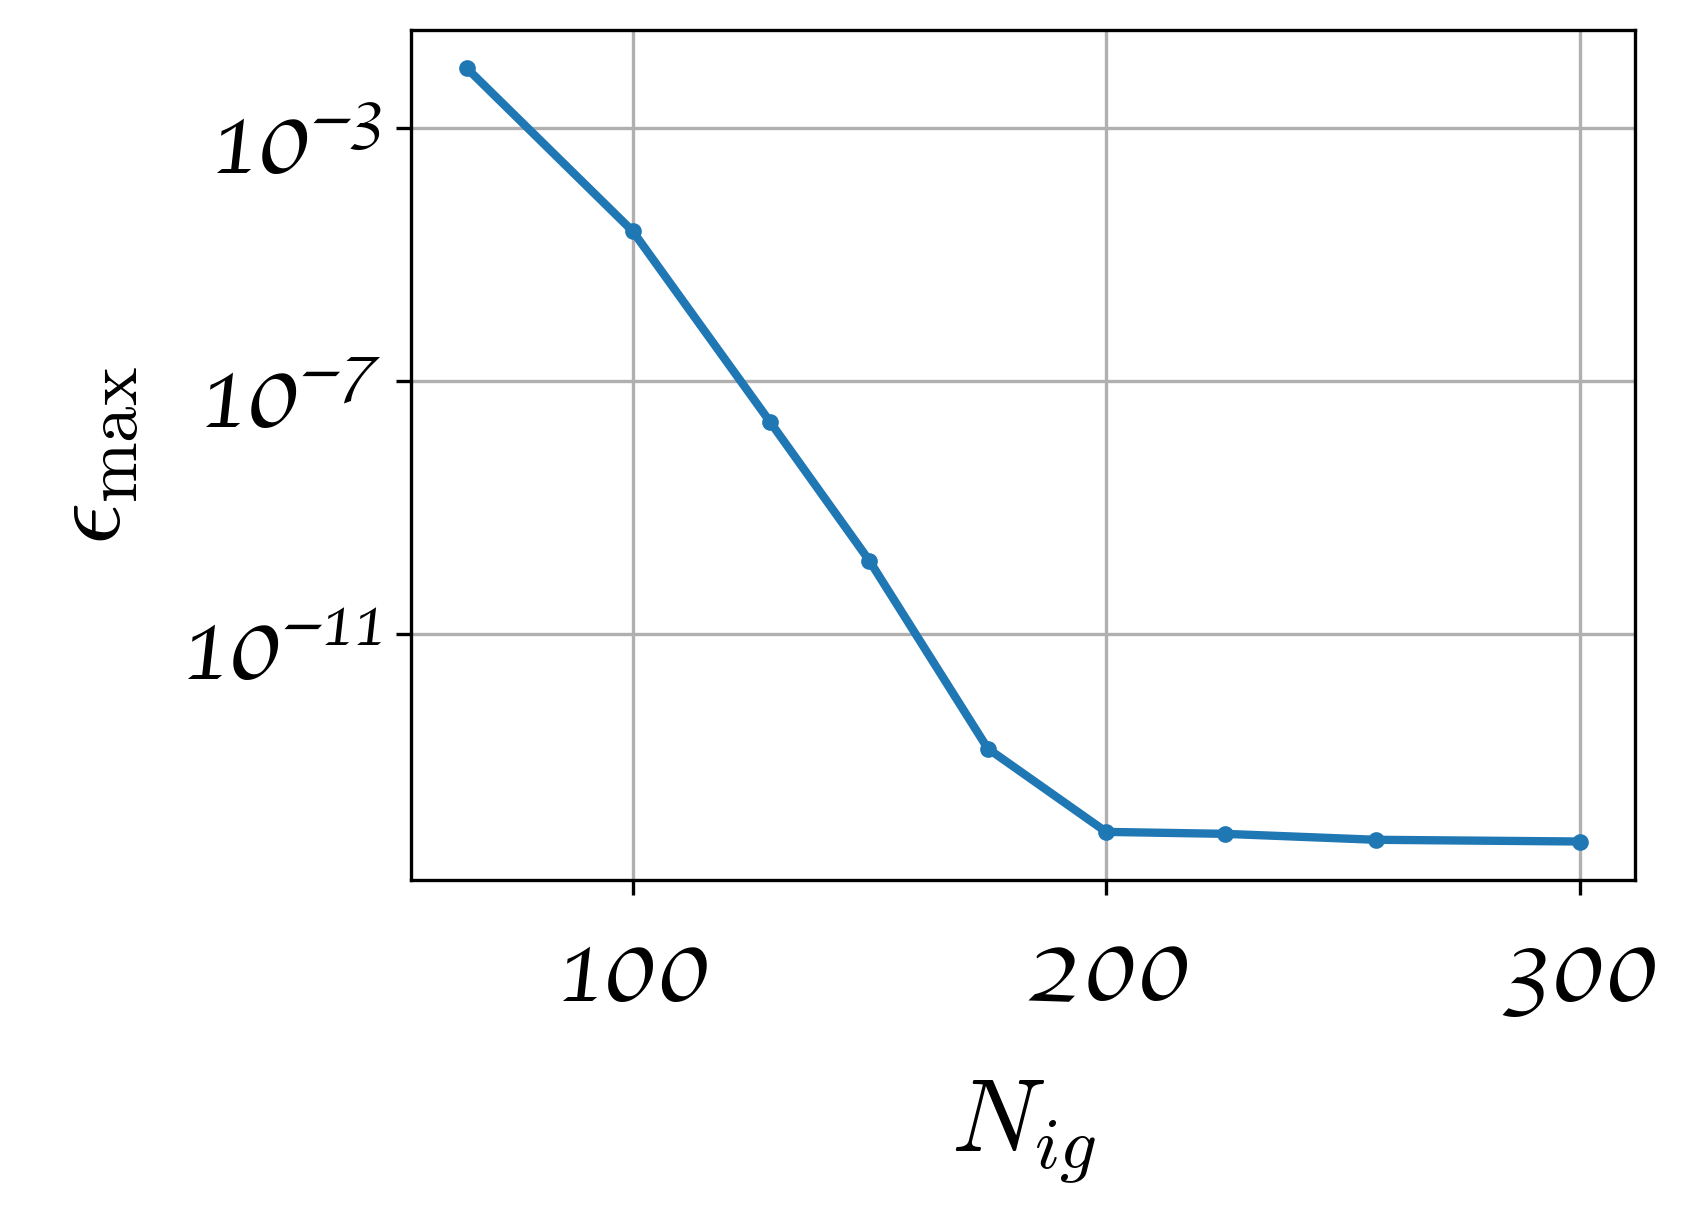

In [95]:
import matplotlib.pyplot as plt

size = 25
params = {
    "figure.figsize": (6, 4.5),
    "legend.fontsize": "xx-large",
    "axes.labelsize": size,
    "axes.titlesize": "xx-large",
    "xtick.labelsize": size,
    "ytick.labelsize": size,
}
plt.rcParams.update(params)
plt.gcf().subplots_adjust(bottom=0.25, left=0.22)

ig = [65, 100, 129, 150, 175, 200, 225, 257, 300]
# max_err = np.array(ig, dtype=float)
# for i in range(len(max_err)):
#     mea = np.max(abs(A_list[i] - A_list[-1])) / abs(A_list[-1].max())
#     meu = np.max(abs(U_list[i] - U_list[-1])) / abs(U_list[-1].max())
#     me = max(mea, meu)
#     print(f"max_err A = {mea}, max_err U = {meu} max_err = {me}")
#     max_err[i] = me
# plt.plot(ig[:-1], max_err[:-1], ".-", lw=2)

dx = np.array(ig, dtype=float)
tarr = np.array(A_list)
Uarr = np.array(U_list)
Uinf = np.zeros_like(Uarr[0])
tinf = np.zeros_like(tarr[0])
fitrange = slice(-3, None)
for i in range(L):
    pU = np.polyfit(1 / dx[fitrange], np.log(Uarr[fitrange, i]), 1)
    Uinf[i] = np.exp(pU[1])
    for j in range(L):
        pt = np.polyfit(1 / dx[fitrange], np.log(abs(tarr[fitrange, i, j])), 1)
        tinf[i, j] = np.exp(pt[1])

max_err = np.zeros_like(dx)
for i in range(len(max_err)):
    met = np.max((abs(tarr[i]) - abs(tinf)) / abs(tinf))
    meu = np.max((abs(Uarr[i]) - abs(Uinf)) / abs(Uinf))
    me = meu
    print(f"R0x = {dx[i]} max_err A = {met}, max_err U = {meu} max_err = {me}")
    max_err[i] = me
plt.plot(dx, max_err, ".-", lw=2)

plt.xlabel("$N_{ig}$")
plt.ylabel("$\epsilon_\mathrm{max}$")
plt.yscale("log")
plt.grid()
plt.savefig("AppFig3.pdf")
